### Projekt na kurs Równania Różniczkowe w Technice
**Autorzy** : Alicja Myśliwiec, Natalia Lach,<br>
Matematyka Stosowana, Politechnika Wrocławska<br>
**Temat**: Krzywe Pościgowe

**Ważne moduły do zaimportowania:**

In [4]:
using Plots
using DifferentialEquations
using LinearAlgebra
using Luxor
using Colors

W sytuacji nie posiadania pewnego modułu należy go pobrać w następujący sposób:

In [ ]:
#using Pkg
#Pkg.add("DifferentialEquations")

# KRZYWE POŚCIGOWE


## SPIS TREŚCI:
* [Wstęp](#wstep)
* [Notka historyczna](#his)
* [Algorytm znajdowania krzywych pościgowych ](#alg)
    * [Proste krzywe pogoni](#prosta)
        * [Wyprowadzenie wzoru ogólnego](#pr_wypr)
        * [Analiza sytuacji dla $k=1$](#k1)
        * [Warunek dogonienia celu](#dogonienie_proste)
        * [Miejsce spotkania](#miejsce_proste)
    * [Sparametryzowane krzywe pogoni](#nie-prosta)
        * [Wyprowadzenie wzoru ogólnego](#param_wypr)
        * [Ucieczka po okręgu](#okrag)
            * [Wyprowadzenie wzoru](#okr_wypr)
            * [Analiza stałych](#RK)
        * [Inne przykłady krzywych pościgowych sparametryzowanych](#przyklady1)
    * [Krzywe w układzie trzech współrzędnych](#3D)
        * [Wzór ogólny](#wypr_3D)
        * [Ruch po helisie](#helisa)
        * [Inne przykłady](#przyklady2)
* [Zadanie z pająkami](#pajak)

# LINKI

https://www.jstor.org/stable/3610038 <br>
https://www.hsu.edu/uploads/pages/2006-7afpursuit.pdf <br>
http://thewessens.net/ClassroomApps/Main/hungrybugs.html?topic=guides&id=4

## Wstęp <a class="anchor" id="wstep"></a>

Celem pracy jest przedstawienie i omówienie pojęcia `Krzywych pościgowych`. Są to krzywe opisujące ruch punktu 'ścigającego' pewien punkt 'ścigany'. Zostaną pokazane analityczne wyprowadzenia oraz wizualizacje omawianych zagadnień, również z uwzględnieniem przestrzeni $ \mathbb{R}^3$ . Zostanie również opisany tzw. $\textit{'Mice Problem'}$ z przykładem oraz ogólnym wyprowadzeniem równań.

## Notka historyczna <a class="anchor" id="his"></a>

## Algorytm znajdowania krzywych pościgowych <a class="anchor" id="alg"></a>

### Proste krzywe pogoni <a class="anchor" id="prosta"></a> 

#### Wyprowadzenie wzoru ogólnego <a class="anchor" id="pr_wypr"></a>

Najprostszym przypadkiem krzywych pościgowych jest sytuacja, w której cel porusza się po pewnej prostej, ze stałą prędkością. Po raz pierwszy zostało to opisane już w 1732r., a podjął się tego francuski uczony *Pierre Bourger*.<br>
Załóżmy zatem, że para $(x,y)$ określa położenie pewnego punktu $A$ w układzie współrzędnych w czasie $t$. Niech w czasie $t = 0$ znajduje się on w $(0,0)$ oraz niech porusza się ze stałą prędkością $\alpha$. Teraz niech punkt $B$ będzie jego celem. $B$ wyrusza z punktu $(x_{0},0)$ ze stałą prędkością $\beta$.<br>
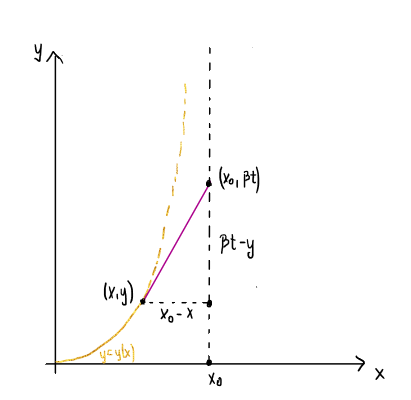<br>
Punkt $A$, goniąc $B$, porusza się zawsze w stronę uciekającego punktu $B$, co oznacza, że wektor prędkości $A$ jest skierowany bezposrednio do $B$ przez cały czas trwania pościgu.<br>
Naszym celem będzie znalezienie równania $y = y(x)$ określającego krzywą pościgu.<br>
Aby to zrobić, znajdziemy stycznej do owej generowanej przez punkt $A$ krzywej pościgu. Punkt $A$ w czasie $t$ znajduje się w $(x,y)$ a punkt $B$ w $(x_{0},\beta t)$. Zatem nachylenie stycznej wyraża się poprzez równanie<br> 
$$\frac{dy}{dx}=\frac{\beta t - y}{x_{0}-x}.$$
Wyliczamy z niego $t$.
$$\frac{dy}{dx}(x_{0}-x)+y=\beta t$$
$$t=\frac{y+\frac{dy}{dx}(x_{0}-x)}{\beta}$$

Wiemy także, że w czasie $t$ punkt $A$ zdążył przebyć pewną trasę, ktorej długość możemy wyliczyć, korzystając ze wzoru na długość łuku z analizy wektorowej.
$$\alpha t = \int_{0}^x \sqrt{1 + {\left( \frac{dy}{dz}\right) }^2 }dz$$
Ponownie znajdujemy $t$.
$$t = \frac{1}{\alpha}\int_{0}^x \sqrt{1 + {\left( \frac{dy}{dz}\right) }^2 }dz$$
Porównujemy teraz wyprowadzone przez nas równania na $t$ i otrzymujemy 
$$\frac{1}{\alpha}\int_{0}^x \sqrt{1 + {\left( \frac{dy}{dz}\right) }^2 }dz = \frac{1}{\beta} \left(y+\frac{dy}{dx}(x_{0}-x)\right)$$ 
Teraz, aby rozwiązać to równanie różniczkowe zastosujemy podstawienie $p(x)=\frac{dy}{dx}$.
$$\frac{\beta}{\alpha}\int_{0}^x \sqrt{1 + {p(z)}^2 }dz = y+p(x)(x_{0}-x)$$ 
Dla ułatwienia podstawmy także stałą $k=\frac{\beta}{\alpha}$ oraz zróżniczkujmy równanie po $dx$.
$$k\sqrt{1 + {p(x)}^2} = \frac{dy}{dx}+\frac{d(p(x)(x_{0}-x))}{dx}$$ 
Stosując zasady różniczkowania iloczynu oraz po ponownym podstawieniu $p(x)=\frac{dy}{dx}$ otrzymujemy
$$k\sqrt{1 + {p(x)}^2} = p(x) + \frac{dp}{dx}(x_{0}-x) - p(x).$$
Zatem po uporządkowaniu zostaje nam równanie różniczkowe pierwszego stopnia, które można rozwiązać metodą rozdzielenia zmiennych.
$$k\sqrt{1 + {p(x)}^2} =\frac{dp}{dx}(x_{0}-x)$$ <br>
$$-k\int\frac{dx}{x-x_{0}}=\int\frac{dp}{\sqrt{1 + {p(x)}^2}}$$
Całka z lewej strony jest całką elementarną z logarytmu, za to ta z prawej wymaga użycia wzoru $\int\frac{dx}{\sqrt{x^2+q}}=\ln{|x + \sqrt{x^2+q}|} + C$. Otrzymujemy
$$-k\ln{|x-x_{0}|}=\ln{|p(x) + \sqrt{1 + {p(x)}^2}|}+C.$$

Aby opuścić wartość bezwględną, w logarytmie z lewej strony musimy zmienić znak, gdyż zakładamy, że $x<x_{0}$. Gdy już punkt A dogoni B (czyli dotrze do punktu $x_0$), to się zatrzyma. W logarytmie z prawej strony zakładamy, że $p(x)=\frac{dy}{dx}$ będzie zawsze dodatnie. Ostatecznie <br>
$$-k\ln{\left( x_{0}-x\right)}=\ln{\left( p(x) + \sqrt{1 + {p(x)}^2}\right)}+C.$$ 
W tym momencie możemy wyliczyć stałą C, biorąc za warunki początkowe $\frac{dy}{dx} = 0$ dla $t=0$. <br>
$$-k\ln{x_{0}} - \ln{1} = C$$ $$C = -k\ln{x_{0}}$$
Otrzymujemy zatem równanie, które porządkujemy przy pomocy działań elementarnych na logarytmach i rozwiązujemy. <br>
$$-k\ln{\left( x_{0}-x\right)}=\ln{\left( p(x) + \sqrt{1 + {p(x)}^2}\right)}-k\ln{x_{0}}$$ <br>
$$k\ln{\left( \frac{x_{0}}{x_{0}-x}\right) }=\ln{\left( p(x) + \sqrt{1 + {p(x)}^2}\right)}$$ <br>
$${\left( \frac{x_{0}}{x_{0}-x}\right) }^k = p(x) + \sqrt{1 + {p(x)}^2}$$ <br>
$${\left( \frac{x_{0}}{x_{0}-x}\right) }^k - p(x) = \sqrt{1 + {p(x)}^2}$$ <br>
$${\left( \frac{x_{0}}{x_{0}-x}\right) }^{2k} - 2p(x){\left( \frac{x_{0}}{x_{0}-x}\right) }^k + {p(x)}^2 = 1 + {p(x)}^2$$ <br>
$$p(x) = \frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{2k}-1 \right)\frac{1}{{\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}}$$ <br>
$$p(x) = \frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-k}\right) $$

 Teraz należy tylko wrócić do wyjściowego podstawienia $p(x)=\frac{dy}{dx}$ i znaleźć szukane $y(x)$. 
 $$\frac{dy}{dx} = \frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-k}\right) $$
 $$\int{dy} = \frac{1}{2}\int{\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-k}\right)dx} $$
 Całka z lewej jest całką elementarną, zajmiemy się całką z prawej.
$$\frac{1}{2}\int{\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-k}\right)dx} = 
\frac{1}{2}\left({x_{0}}^k\int{{(x_{0}-x)}^{-k}dx}-{x_{0}}^{-k}\int{{(x_{0}-x)}^{k}dx}\right)=
\begin{vmatrix}
w = x_{0}-x\\
dw = -dx
\end{vmatrix} = $$
$$\frac{1}{2}\left( -{x_{0}}^k\int{{w}^{-k}dw}+{x_{0}}^{-k}\int{{w}^{k}dw}\right) = 
\frac{1}{2}\left( -{x_{0}}^k\frac{{w}^{-k+1}}{-k+1}+{x_{0}}^{-k}\frac{{w}^{k+1}}{k+1}\right) + C=
\frac{1}{2}\left( -{x_{0}}^k\frac{{(x_{0}-x)}^{-k+1}}{-k+1}+{x_{0}}^{-k}\frac{{(x_{0}-x)}^{k+1}}{k+1}\right) + C=$$
$$\frac{1}{2}(x_{0}-x)\left( -\frac{{x_{0}}^k{(x_{0}-x)}^{-k}}{-k+1}+\frac{{x_{0}}^{-k}{(x_{0}-x)}^{k}}{k+1}\right) + C=
\frac{1}{2}(x_{0}-x)\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1}{k+1}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1}{1-k}\right) + C
$$
Ostatecznie otrzymujemy zatem, że 
$$y(x) = \frac{1}{2}(x_{0}-x)\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1}{k+1}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1}{1-k}\right) + C
$$
Mamy jednak niewykorzystane warunki początkowe w formie punktu startowego - $y(0)=0$. Podstawiamy.
$$y(0) = \frac{1}{2}x_{0}\left( \frac{1}{k+1} - \frac{1}{1-k}\right) +C = 0$$
$$C = -\frac{1}{2}x_{0}\frac{1-k-k-1}{1-k^2}= x_{0}\frac{k}{1-k^2}$$


Ostatecznie równanie prostej krzywej pościgu wyraża się wzorem
$$y(x) = \frac{1}{2}(x_{0}-x)\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1}{k+1}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1}{1-k}\right) + x_{0}\frac{k}{1-k^2},$$
gdzie $k=\frac{\beta}{\alpha}$ - stosunek prędkości punktów $B$ i $A$.

To teraz zobrazujmy znalezione krzywe pościgu.

In [15]:
f(x,x_0=5.0,k=1.1) = 1/2*(x_0-x)*(((x_0-x)/x_0)^k*1/(k+1)-(x_0/(x_0-x))^k*1/(1-k))+x_0*k/(1-k^2)

function proste(x_0=5,k=1.1) 
    g(x) = f(x,x_0,k)
    plot(g,0,10, title=k)
    display(vline!([x_0]))
end

proste (generic function with 3 methods)

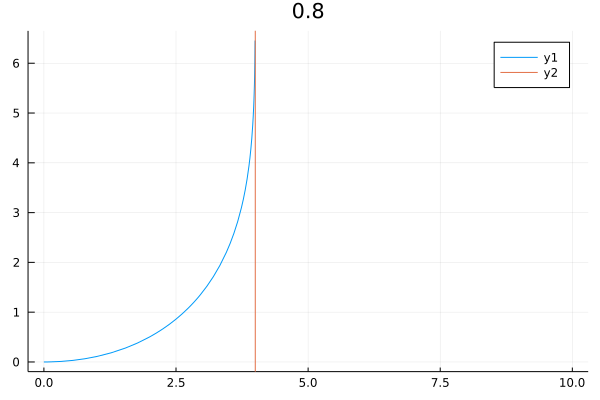

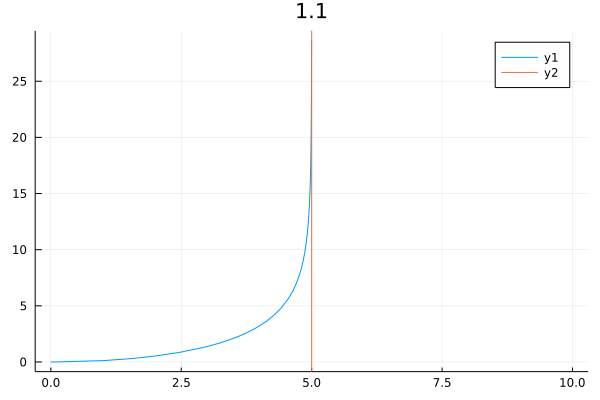

In [16]:
proste(4,0.8)
proste()



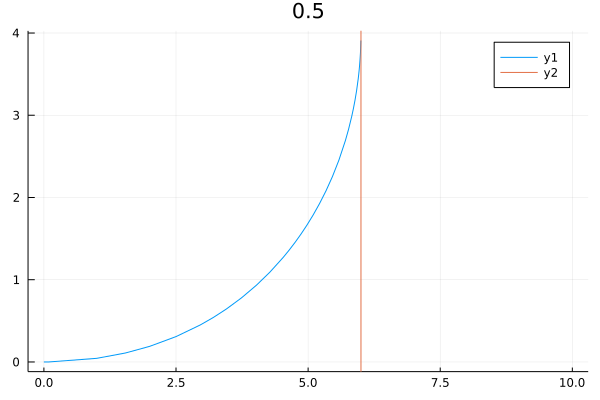

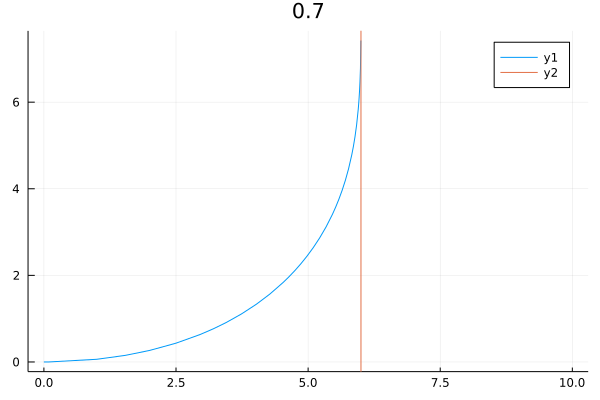

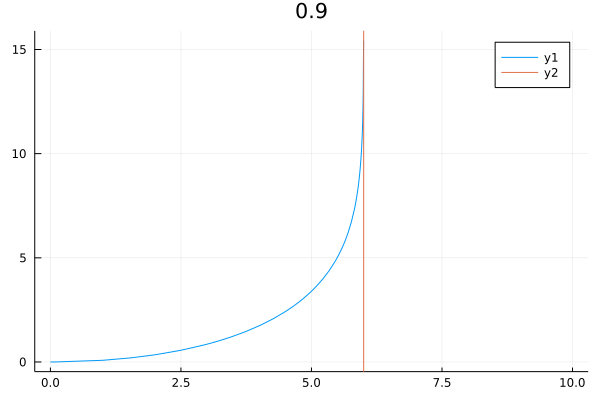

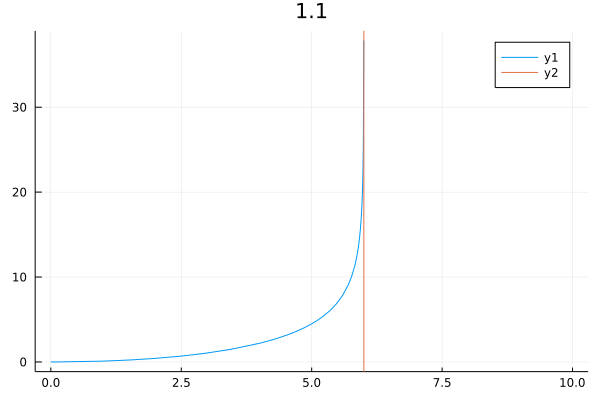

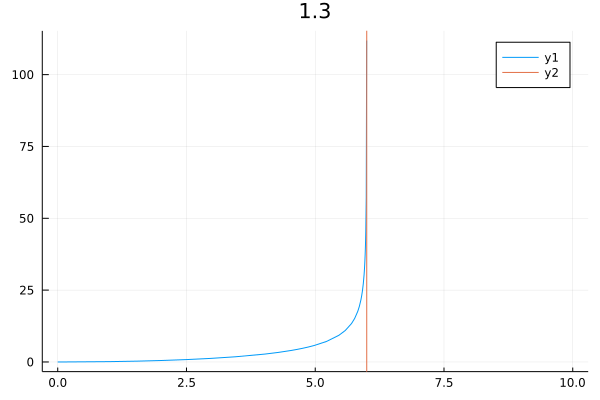

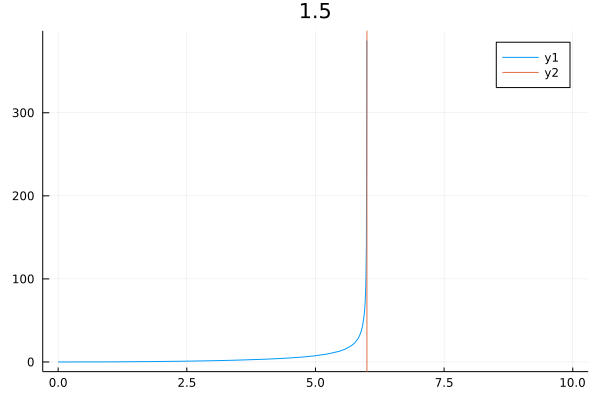

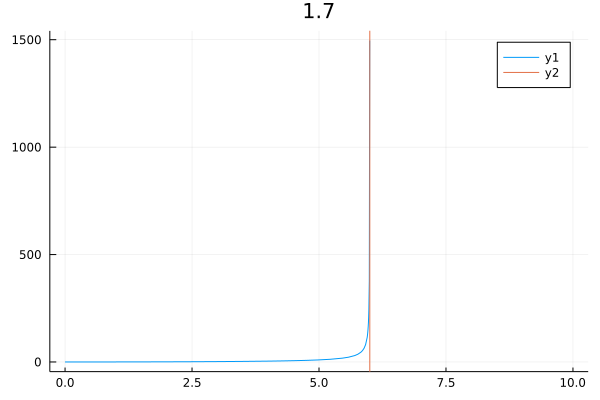

In [17]:
for k in 0.5:0.2:1.7
    proste(6,k)
end

Niestety, aby stworzyć animacje będzie trzeba wykorzystać potęgę Julii i jej metod numerycznych, gdyż wyznaczanie wartości funkcji dla punktów zbliżających się do $x_0$ jest niezbyt dokładne. Do ich realizacji wykorzystamy zależność opisującą ową sytuację pogoni, ale dla krzywych sparametryzowanych. <br>
Niech $H(t)$ będzie szukaną krzywą pościgu, a $R(t)$ będzie znaną nam krzywą ucieczki. Niech $\alpha$ będzie wartością prędkości uciekiniera, a $k$ - stosunkiem prędkości obu punktów. Wtedy krzywa pogoni goniącego $H(t)$ jest wyrażona poprzez równość 
$$H' = k\alpha\frac{R-H}{|R-H|}.$$ 
Jest to równość, która zostanie dokładnie przez nas wyprowadzona w kolejnych częściach projektu - *Co by było gdyby cel uciekał po krzywej nie będącej prostą?*.<br>
Dla ułatwienia,bez straty ogólności, przyjmiemy, że $\alpha=1$.<br>
Przykładowe zobrazowanie sytuacji dla $x_0=5$ i $k=1.2$ jest pokazane poniżej.

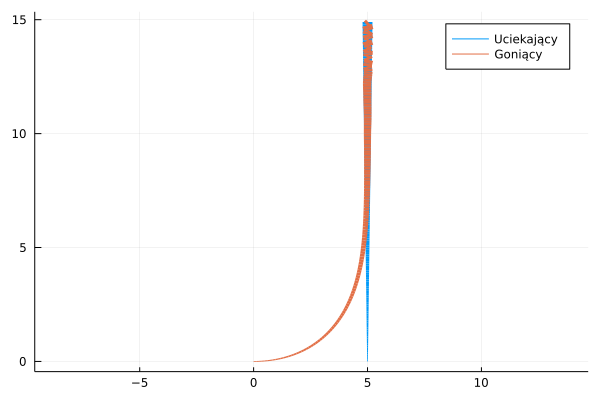

┌ Warning: Indices Base.OneTo(151) of attribute `linewidth` does not match data indices 1:150.
└ @ Plots C:\Users\admin\.julia\packages\Plots\FKcum\src\utils.jl:108
┌ Warning: Indices Base.OneTo(151) of attribute `linewidth` does not match data indices 1:150.
└ @ Plots C:\Users\admin\.julia\packages\Plots\FKcum\src\utils.jl:108


In [18]:
using Plots, DifferentialEquations, LinearAlgebra

@userplot PursuitPlot
@recipe function f(cp::PursuitPlot)
    t, u = cp.args
    ##u jest postaci np [[5,0],[5,0.1]...]
    x = [u[i][1] for i in 1:1:length(u)-1]
    y = [u[i][2] for i in 1:1:length(u)-1]
    ##tworzymy listę x,y
    n = length(x) ##im dłuzsza lista x tym grubszy marker
    linewidth --> range(0.75, 10, length = n+1)
    aspect_ratio --> 1
    x, y
end


pursuit(u, k, t) = k * (pursued(t) - u) / norm(pursued(t)-u) ##ogólne równanie 
pursued(t) = [5, t] ##sparametryzowana krzywa ucieczki 
prob = ODEProblem(pursuit, [0.0, 0.0], (0.0, 15), 1.2) ##miejsce początkowe, ilość wykonań, stała k
sol = solve(prob, saveat=0.1);

pursuitplot(sol.t, pursued.(sol.t), label="Uciekający")
pursuitplot!(sol.t, sol.u, label="Goniący")

Stwórzmy ogólną funkcję generującą animacje ruchu po prostej krzywej pościgowej.

In [25]:
function animacje_proste(k,tim=10)
    anim = @animate for i = 1:0.1:tim
        prob = ODEProblem(pursuit, [0.0, 0.0], (0.0,i), k) 
        sol = solve(prob, saveat=0.1);

        pursuitplot(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(0,10), ylim=(0,tim+5), title=k)
        pursuitplot!(sol.t, sol.u, label="goniacy")
    end

    gif(anim, "proste"*string(k)*".gif", fps = 10)
end

animacje_proste (generic function with 2 methods)

I przykładowa animacja dla $x_0 =3$ i $k=1.1$

In [27]:
pursued(t) = [3, t]
#animacje_proste(1.1)

pursued (generic function with 1 method)

<img src="animacje\3proste1_1.gif"/>


A teraz porównanie róznych $k$ dla $x_0=4$.

In [29]:
pursued(t) = [4, t]
#for k in 0.5:0.2:1.5
#    animacje_proste(k)
#end

pursued (generic function with 1 method)

<img src="animacje\proste0.5.gif"/> 
<img src="animacje\proste0.7.gif"/>
<img src="animacje\proste0.9.gif"/>
<img src="animacje\proste1.1.gif"/>
<img src="animacje\proste1.3.gif"/>
<img src="animacje\proste1.5.gif"/>

#### Co by było gdyby $k=1$ ? <a class="anchor" id="k1"></a>
Analizując wykres i jego wyprowadzenie musimy wziąć pod uwagę założenie, że działa on tylko dla $k\neq 1$. Zatem jak wyglądałoby $y(x)$, gdyby $k = 1$?<br>
Wróćmy do momentu, w którym pierwszy raz pojawiło się założenie o $k\neq 1$, czyli przy rozwiązywaniu równania z pochodną $y'(x)$ takim, że $$\frac{dy}{dx} = \frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }^{k}-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-k}\right). $$
Podstawmy do niego $k=1$.
$$\frac{dy}{dx} = \frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }-{\left( \frac{x_{0}}{x_{0}-x}\right) }^{-1}\right) = 
\frac{1}{2}\left( {\left( \frac{x_{0}}{x_{0}-x}\right) }-{\left( \frac{x_{0}-x}{x_{0}}\right) }\right) =$$$$
\frac{1}{2}\frac{x_{0}^2-(x_0-x)^2}{x_0(x_{0}-x)} =
\frac{1}{2}\frac{x_{0}^2-x_0^2+2x_0x-x^2}{x_0(x_{0}-x)} =
\frac{1}{2x_0}\frac{2x_0x-x^2}{x_{0}-x} = 
\frac{1}{2x_0}\frac{x_0x + x_0x - x^2}{x_{0}-x} = 
\frac{1}{2x_0}\left( \frac{x_0x}{x_0-x} + x\right)  =$$$$
\frac{x}{2x_0} -\frac{1}{2}\frac{x-x_0+x_0}{x-x_0}  = 
\frac{x}{2x_0} - \frac{1}{2} -\frac{1}{2}\frac{x_0}{x-x_0} $$
Rozwiążmy podane równanie różniczkowe metodą rozdzielenia zmiennych.
$$\frac{dy}{dx} = \frac{x}{2x_0} - \frac{1}{2} -\frac{1}{2}\frac{x_0}{x-x_0}$$
$$2x_0\frac{dy}{dx} = x - x_0 -\frac{x_0^2}{x-x_0}$$

$$2x_0\int dy = \int (x - x_0 -\frac{x_0^2}{x-x_0})dx$$
$$2x_0\int dy = \int xdx - x_0\int dx -x_0^2\int \frac{1}{x-x_0}dx$$
$$2x_0 y = \frac{1}{2}x^2 - x_0x - x_0^2 \ln{|x-x_0|} + C$$
Weźmy teraz pod uwagę, że $x_0$ z założenia jest dodatnie, za to $x \in [0,x_0)$, dlatego należy zmienić znaki w logarytmie. Otrzymujemy 
$$y = \frac{1}{4x_0}x^2 - \frac{1}{2}x - \frac{x_0}{2} \ln{(x_0-x)} + C.$$
Podstawmy wyrażenie początkowe $y(0)=0$, aby znależć stałą $C$.
$$0 = 0 - 0 - \frac{x_0}{2} \ln{x_0} + C \Rightarrow C = \frac{x_0}{2} \ln{x_0} $$
Wstawiamy do równania i otrzymujemy ostateczną postać $y(x)$ dla $k=1$.
$$y = \frac{1}{4x_0}x^2 - \frac{1}{2}x - \frac{x_0}{2} \ln{(x_0-x)} + \frac{x_0}{2} \ln{x_0} = 
 \frac{1}{4x_0}x^2 - \frac{1}{2}x + \frac{x_0}{2} \ln{\frac{x_0}{x_0-x}} $$

Przykładowy wykres dla $x_0=5$.

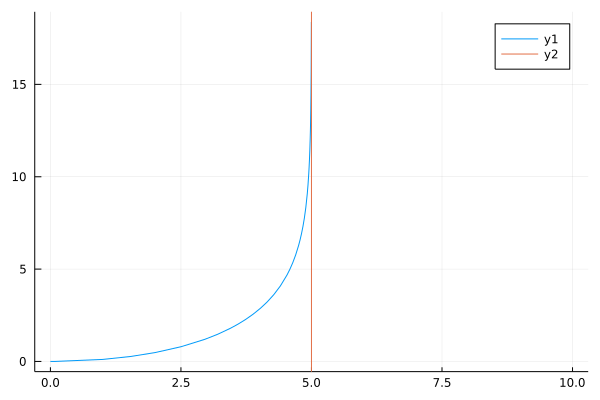

In [30]:
f(x,x_0)=1/4/x_0*x^2-1/2*x+x_0/2*log(x_0/(x_0-x))
r(x) = f(x,5)
plot(r,0,10)
vline!([5])

Ponownie korzystamy z wcześniej stworzonej metody, aby wygenerować animację dla $x_0=5$.

In [33]:
pursued(t) = [5, t]
#animacje_proste(1)

pursued (generic function with 1 method)

<img src="animacje\proste1.gif"/>

#### Skąd wiadomo, że jeden dogoni drugiego? <a class="anchor" id="dogonienie_proste"></a>
<br>
Aby znaleźć warunek dogonienia musimy sprawdzić co się dzieje, gdy $x\to x_0$. Zatem należy policzyć granicę $\lim_{x\to x_0} y(x)$. Aby to zrobić wpierw przekształćmy trochę wyrażenie na $y(x)$.

$$\begin{split}
y(x) & = \frac{1}{2}(x_{0}-x)\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1}{k+1}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1}{1-k}\right) + x_{0}\frac{k}{1-k^2} \\
 & = \frac{1}{2}(x_{0}-x)\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1-k}{1-k^2}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1+k}{1-k^2}\right) + x_{0}\frac{k}{1-k^2} \\
  & = \frac{x_0}{2}\frac{x_{0}-x}{x_0}\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{k}\frac{1-k}{1-k^2}-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k}\frac{1+k}{1-k^2}\right) + x_{0}\frac{k}{1-k^2} \\
  & = \frac{x_0}{2}\frac{1}{1-k^2}\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{1+k}(1-k)-{\left(\frac{x_{0}}{x_{0}-x}\right)}^{k-1}(1+k)\right) + x_{0}\frac{k}{1-k^2} \\
  & = \frac{x_0}{2}\frac{1}{1-k^2}\left({\left(\frac{x_{0}-x}{x_{0}}\right)}^{1+k}(1-k)-{\left(\frac{x_{0}-x}{x_{0}}\right)}^{1-k}(1+k) + 2k\right) \\
  & = \frac{kx_0}{2(1-k^2)}\left({\left(1-\frac{x}{x_{0}}\right)}^{1+k}\frac{1-k}{k}-{\left(1-\frac{x}{x_{0}}\right)}^{1-k}\frac{1+k}{k}+ 2\right)
 \end{split}$$<br>
Teraz zauważmy, że gdy podstawimy $x=x_0$, $(1-\frac{x}{x_0})$ będzie równe zeru. Jednak trzeba uważać na potęgi, do których są podniesione oba nawiasy, gdyż mogą nam one odwrócić ułamek.<br>
Można zauważyć, że dla $k<1$ $$\lim_{x\to x_0} y(x) = \frac{kx_0}{2(1-k^2)}\left( 2 + 0 + 0\right) = \frac{kx_0}{1-k^2},$$ <br> zatem granica jest skończona. <br>
Ale dla $k>1$ granica już będzie nieskończona  $$\lim_{x\to x_0} y(x) = \frac{kx_0}{2(1-k^2)}\left( 2 + 0 + \left[ \frac{const}{0} \right] \right)=\infty.$$<br>
Zanalizujmy teraz sytuację i otrzymane wyniki.<br>
Nasz uciekinier porusza się po prostej pionowej $x=x_0$, która jest asymptotą pionową. Z definicji asymptoty wynika jasno, że  $\lim_{x\to x_0} f(x) = \infty$, zatem jeśli celem goniącego jest dogonienie uciekiniera to musi on ostatecznie wejść na linię asymptoty, a więc i granica jego ścieżki poruszania się przy $x \to x_0$ musi wynieść $\infty$. <br>
Oznacza to, że goniący dogoni swój cel wtedy, gdy $k>1$.

Rozważmy teraz osobny przypadek, gdy $k=1$. <br>
Granica $\lim_{x\to x_0}(\frac{1}{4x_0}x^2 - \frac{1}{2}x + \frac{x_0}{2} \ln{\frac{x_0}{x_0-x}}) = \infty$, czyli goniący teoretycznie w którymś momencie "wyląduje" na asymptocie. <br>
Zauważmy jednak, że skoro $k = 1$ to nawet, jeśli goniący stanie w lini prostej do celu, to nie zmniejszy on odległości między nim a celem, bo poruszają się oni z tą samą prędkością. <br>
Sytuację świetnie obrazuje animacja.

In [35]:
pursued(t) = [6, t]
#animacje_proste(1,20)

pursued (generic function with 1 method)

<img src="animacje\proste1_20.gif"/>

Mimo wszystko, żeby rzeczywiście pokazać, że nigdy się nie dogonią, zanalizujmy jak zmieniają się odleglości goniącego od celu w czasie trwania ruchu.

[5.0, 4.901006631578423, 4.80405274301983, 4.709176863745128, 4.6164162748986675, 4.52580674877818, 4.43738234594039, 4.351175156572315, 4.2672148924755255, 4.185528692549378, 4.1061409251529035, 4.029072590166738, 3.954341825576697, 3.8819631532813212, 3.8119467308976844, 3.7442983895085886, 3.679019689683932, 3.6161079978407935, 3.5555562288584217, 3.49735124164948, 3.4414777253492455, 3.3879149158087096, 3.3366362635856417, 3.287609919519373, 3.2407992724509342, 3.1961635349108217, 3.1536583714951667, 3.1132365636785844, 3.0748475399540323, 3.0384344037571465, 3.003940644044797, 2.9713068923379167, 2.940470958848863, 2.9113684168998315, 2.8839332037765555, 2.858098229343598, 2.833795983868069, 2.8109591368593856, 2.789521119308305, 2.769416682465466, 2.7505823801916365, 2.73295447755014, 2.7164683854773184, 2.701061676846444, 2.686674209876244, 2.673248143601217, 2.6607279404675577, 2.6490603562072508, 2.63819441729332, 2.6280813864116195, 2.6186747164991084, 2.609929993995849, 2.60

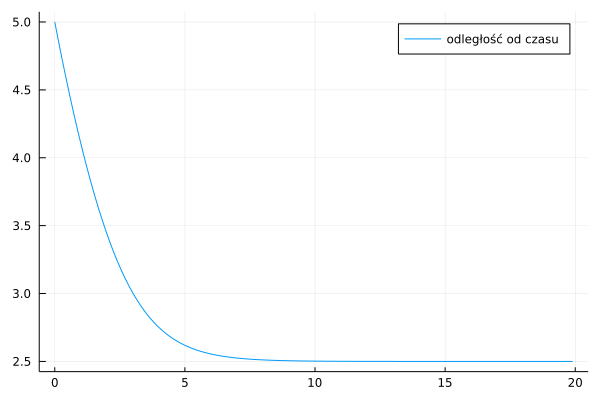

In [40]:
pursued(t) = [5, t]
prob = ODEProblem(pursuit, [0.0, 0.0], (0.0,50), 1) 
sol = solve(prob, saveat=0.1);

pursuitplot(sol.t, pursued.(sol.t), label="Rabbit")
pursuitplot!(sol.t, sol.u, label="Fox")


odl = [sqrt((sol.u[i][1]-pursued.(sol.t)[i][1])^2 + (sol.u[i][2]-pursued.(sol.t)[i][2])^2) for i in 1:1:200]
t = [i for i in 0:0.1:19.9]
print(odl[1:150])
plot(t, odl, label="odległość od czasu")

Łatwo zauważyć, że od pewnego momentu odległość między goniącym a uciekinierem zaczyna się stabilizować, co potwierdza naszą hipotezę. Przykładowo, dla $x_0 = 5$ ustala się ona na poziomie mniej więcej $2.5$ (czyli goniący zmniejszył swoją odległość o połowę, co niestety nie wystarczyło).<br><br>

Ostateczny wniosek jest zatem taki, że aby goniący złapał swój cel stosunek jego prędkości do prędkości uciekiniera musi być większy od $1$, czyli $k>1$.

#### Skoro się spotkają, to kiedy? <a class="anchor" id="miejsce_proste"></a>
Skoro już wiemy, że goniący złapie swój cel dla pewnych wartości $k$, to czas teraz wyznaczyć czas i  miejsce spotkania. Z racji tego, że próby znalezienia granicy przy $x\to x_0$ już z definicji kończą się na $\infty$, wyznaczenie bezpośrednie miejsca spotkania punktów jest bardzo ciężkie, o ile nie niemożliwe, zatem znajdziemy owe miejsce korzystając z analizy wykresów i przybliżeń. I tym razem skorzystamy z metod numerycznych i funkcji Julii. <br>
Stwórzmy funkcję, która sprawdza odległości między punktami i która znajdzie taki parametr, że odległość między punktami wyniesie wartość bliską zeru.

In [41]:
function meet(x_0, k, acc=0.01, lgth = 30) ##acc - accuracy czyli dokładnosc wyznaczenia miejsca spotkania
    pursued(t) = [x_0, t]
    prob = ODEProblem(pursuit, [0.0, 0.0], (0.0, lgth), k)
    sol = solve(prob, saveat=0.1);

    odl = [sqrt((sol.u[i][1]-pursued.(sol.t)[i][1])^2 + (sol.u[i][2]-pursued.(sol.t)[i][2])^2) for i in 1:1:lgth*10]
    t = [i for i in 0:0.1:(lgth-0.1)]
    display(plot(t,odl,label="odległość od czasu"))
    
    for i in 1:1:lgth*10
        if odl[i] < acc
            println("odl: ",odl[i])
            println("x: ",pursued.(sol.t)[i][1])
            println("y: ",pursued.(sol.t)[i][2])
            return
        end
    end
end


meet (generic function with 3 methods)

Zanalizujmy przykład dla $x_0 = 3$ i $k = 1.5$

In [43]:
pursued(t) = [3, t]
#animacje_proste(1.5)

pursued (generic function with 1 method)

<img src="animacje\3proste1.5.gif"/>

Z animacji wynika, że punkty dogonią się gdzieś między $y=4$ a $y=5$. Sprawdźmy wynik funkcji.

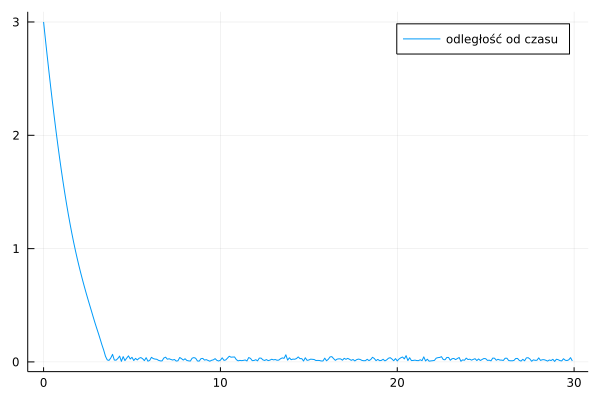

odl: 0.004906224166226158
x: 3.0
y: 4.4


In [44]:
meet(3,1.5)

Zauważmy, że wykres odległości nie jest już tak gładki jak w przypadku analizy odległości dla $k=1$. Dzieje się tak dlatego, że gdy cel zostanie dogoniony, to goniący, mający większą od niego prędkość, musi hamować aby dostosować się do jego toru ruchu. Goniący oscyluje wokół celu, a przez niedokładność funkcji i obliczeń na wykresie powstają nierówności. <br>
Z drugiej strony, dzięki temu mankamentowi można łatwo zauważyć moment spotkania obu punktów analizując sam wykres i tu znowu zauważamy, że spotkanie nastąpiło w przedziale $(4,5)$.<br>
Jednak funkcja przybliżyła owy moment i wyznaczyła go na $y=4.4$. Dlatego też spotkanie odbyło się w punkcie $(3,4.4)$

Rozważmy kolejny przykład - $x_0 = 6$ i $k = 1.3$.

In [47]:
pursued(t) = [6, t]
#animacje_proste(1.4)

pursued (generic function with 1 method)

<img src="animacje\6proste1.4.gif"/>

Z animacji wynika, ze spotkają się gdzieś w okolicy $y=8$ i $y=9$. Sprawdźmy to.

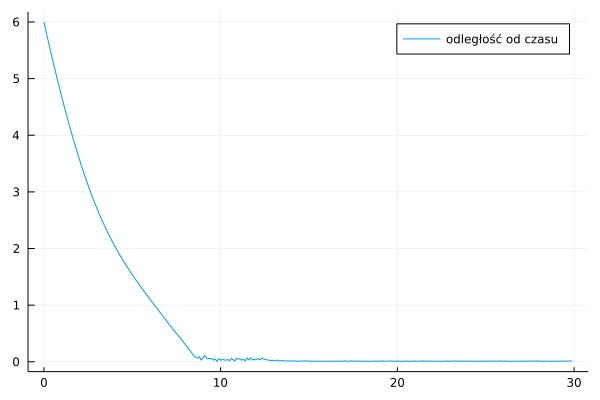

odl: 0.02943374273029847
x: 6.0
y: 8.9


In [48]:
meet(6,1.4, 0.04)

Rzeczywiście miejsce spotkania oscyluje wokół $y=8.9$. <br>
Niech teraz $k$ będzie małe, $k=1.1$.

In [50]:
pursued(t) = [5, t]
#animacje_proste(1.1,20)

pursued (generic function with 1 method)

<img src="animacje\proste1.1_20.gif"/>

Dla tak małego $k$ miejsce spotkania jest już dość oddalone, na tyle, że ciężko jest to wyczytać z animacji. Wiemy, że odbędzie się ono za $y=20$. Niech funkcja policzy to za nas.

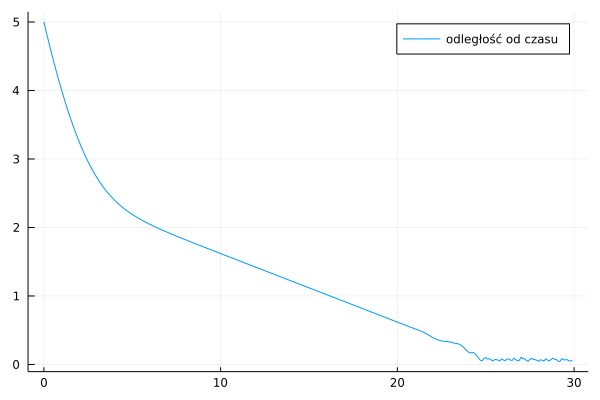

In [51]:
meet(5,1.1, 0.01)

Niestety dla tak małej wartosci dokładności program nie wykrył miejsca spotkania, ale z wykresu możemy stwierdzić, że miało to miejsce w okolicach $y=25$. Zwiększmy wartość dokładności. 

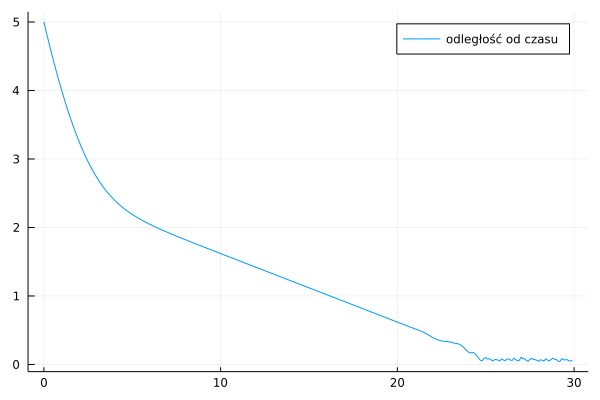

odl: 0.045766391204790396
x: 5.0
y: 27.4


In [21]:
meet(5,1.1, 0.05)

Po aktualizacji otrzymaliśmy informacje, że punkty spotkały się w okolicach $(5,27)$. <br>
Jak widać, metoda znajdowania miejsca spotkania poprzez szukanie wartości odległości najbliższych zeru nie jest zbyt dokładna, jednak analizując wykresy i animacje możemy śmiało przewidywać wynik i będzie on zgodny dla obu tych metod. 

### Co by było gdyby cel uciekał po krzywej nie będącej prostą?<a class="anchor" id="nie-prosta"></a>
#### Wyprowadzenie wzoru ogólnego <a class="anchor" id="param_wypr"></a>
<br>
Załóżmy, że nasz uciekinier w ramach urozmaicenia wybrał bardziej zawiłą ścieżkę ucieczki. Niech ucieka on po krzywej danej parametrycznie $r(t)=[r_{1}(t),r_{2}(t)]$ i chcemy sprawdzić jak tym razem wyglądałaby krzywa pościgu goniącego  $h(t)=[h_{1}(t),h_{2}(t)]$.<br>
I tym razem naszym celem jest wyznaczenie prostej stycznej do kierunku biegu uciekiniera, czyli wektora prędkości zawsze skierowanego w jego stronę, tylko teraz będzie on dany parametrycznie $\frac{dh(t)}{dt} = \left[ \frac{dh_{1}(t)}{dt},\frac{dh_{2}(t)}{dt}\right] $.<br>
Zaczniemy od wyznaczenia kierunku. Wektor prędkości, nazwijmy go $s(t)$, wyraża się poprzez wektor zmiany przemieszczenia na osi $X$ oraz $Y$, a więc $s(t) = \left[h_1(t)-r_1(t),h_2(t)-r_2t)\right]$. <br>
Chcemy jednak by był on odpowiedniej długości, zatem pierwsze musimy go znormalizować - podzielić go przez długość $s(t)$, aby następnie pomnożyć przez długość szukanego wektora prędkości $\frac{dh(t)}{dt}$. <br>
Długość wektora $s(t)$ wyraża się wzorem $|s(t)| = \sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}.$<br>
A długość $\left| \frac{dh(t)}{dt} \right|$ znajdziemy poprzez analogię do poprzedniego zagadnienia, czyli szukania prostych krzywych pościgowych. <br>
Wiemy jak wygląda tor ucieczki $r(t)$ i znamy zatem prędkość jak i długość wektora prędkości, gdyż $\left|\frac{dr(t)}{dt}\right| = \sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}.$<br>
Jeśli teraz założymy, że stosunek prędkości goniącego do uciekiniera wyniesie pewną stałą $\frac{\left|\frac{dh(t)}{dt}\right|}{\left|\frac{dr(t)}{dt}\right|}=k$ to otrzymujemy, że $\left|\frac{dh(t)}{dt}\right|=k\left|\frac{dr(t)}{dt}\right|$.<br>
Wstawiamy wszystko do równania i otrzymujemy
$$\frac{dh(t)}{dt}=
k\frac{\left|\frac{dr(t)}{dt}\right|}{\left|r(t)-h(t)\right|}\left[ r_1(t)-h_1(t), r_2(t)-h_2(t)\right]=
k\frac{\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}}\left[ r_1(t)-h_1(t), r_2(t)-h_2(t)\right].$$
Dzięki temu uzyskujemy ostateczne równania $\frac{dh_1(t)}{dt}$ oraz $\frac{dh_2(t)}{dt}$ krzywej pościgowej.
$$h_1'(t) = k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}\frac{r_1(t)-h_1(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}}$$ <br>
$$h_2'(t)= k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}\frac{r_2(t)-h_2(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}}$$


Jak widać są to równania dość skomplikowane, z których wyprowadzenie wzorów na $h_1(t)$ i $h_2(t)$ będzie bardzo trudne, szczególnie przy bardziej wyszukanych krzywych ucieczki $r(t)$. <br>
Jest to zatem dobry moment, aby wprowadzić metodę numeryczną, która pomoże nam wygenerować szukane krzywe pościgu.

### Ucieczka po okręgu <a class="anchor" id="okrag"></a>

#### Wyprowadzenie <a class="anchor" id="okr_wypr"></a>
Załóżmy teraz, że nasz uciekinier porusza się po okręgu określonym parametrycznie $r(t)=[R\cos{t}, R\sin{t}]$, gdzie $R$ będzie danym, dodatnim promieniem. Do wyprowadzenia równania krzywej pościgu użyjemy oczywiście wyżej wyprowadzonego wzoru na $h(t)$.
$$h_1'(t) = k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}\frac{r_1(t)-h_1(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}}$$
$$h_2'(t)= k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}\frac{r_2(t)-h_2(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2}}$$

Obliczmy pierwsze $\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2}$.<br>
$\frac{dr_1(t)}{dt}= \frac{d(R\cos{t})}{dt}=-R\sin{t}$ oraz $\frac{dr_1(t)}{dt}= \frac{d(R\sin{t})}{dt}=R\cos{t}$. <br>
Zauważmy zatem, że $\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2} = 
\sqrt{\left( -R\sin{t}\right) ^2 + \left( R\cos{t}\right) ^2} = \sqrt{R^2[(\sin{t})^2 + (\cos{t})^2]} = |R| = R$. <br>

Dla przejrzystości zapisu zastosujmy podstawienie $h_1(t) = x$ oraz $h_2(t) = y$. <br>
Ostatecznie otrzymujemy, że 
$$x'(t) = kR\frac{R\cos{t} - x}{\sqrt{\left(R\cos{t}-x\right)^2 + \left(R\sin{t}-y\right)^2}},$$
$$y'(t) = kR\frac{R\sin{t} - y}{\sqrt{\left(R\cos{t}-x\right)^2 + \left(R\sin{t}-y\right)^2}},$$
gdzie $k$ jest stałą określającą stosunek prędkości punktów, a R - promien okręgu po którym porusza się uciekinier.

Wykorzystajmy potęgę komputera i metod Julii do wygenerowania krzywej.<br>
Na początek weźmy $R=1$.

In [52]:
function lorenz!(du,u,k,t)
 du[1] = k*(cos(t)-u[1])/sqrt((cos(t)-u[1])^2+(sin(t)-u[2])^2)
 du[2] = k*(sin(t)-u[2])/sqrt((cos(t)-u[1])^2+(sin(t)-u[2])^2)
end

lorenz! (generic function with 1 method)

In [66]:
function okrag_param(k,tim=15)   
    u0 = [0.0;0.0]
    tspan = (0.0,tim)
    prob = ODEProblem(lorenz!,u0,tspan,k)
    sol = solve(prob)
    x = [cos(t) for t in 0:0.1:tim]
    y = [sin(t) for t in 0:0.1:tim]
    plot(x,y, color="mediumspringgreen", label="uciekinier", title=k)
    display(plot!(sol,vars=(1,2), color="purple", label="goniacy"))

end

okrag_param (generic function with 2 methods)

A teraz porównajmy wykresy dla róznych stałych $k$.

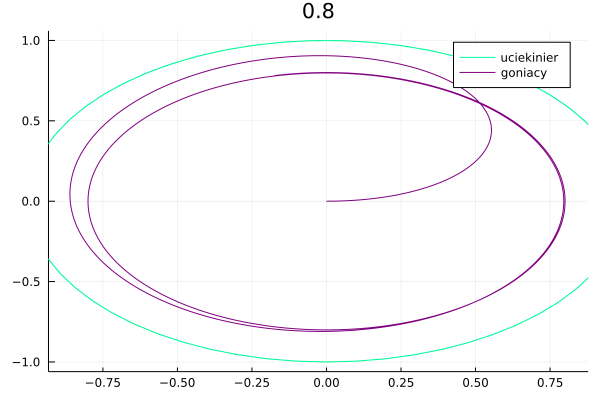

In [67]:
okrag_param(0.8)

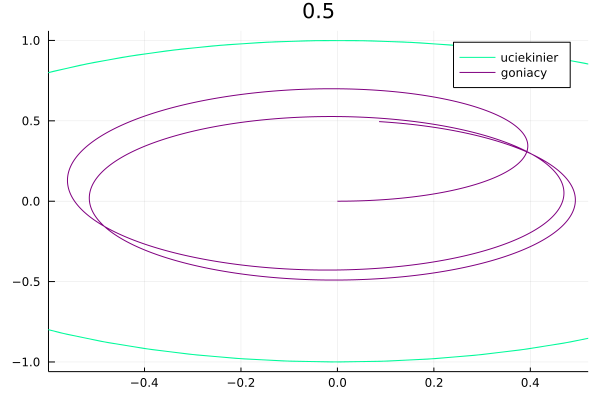

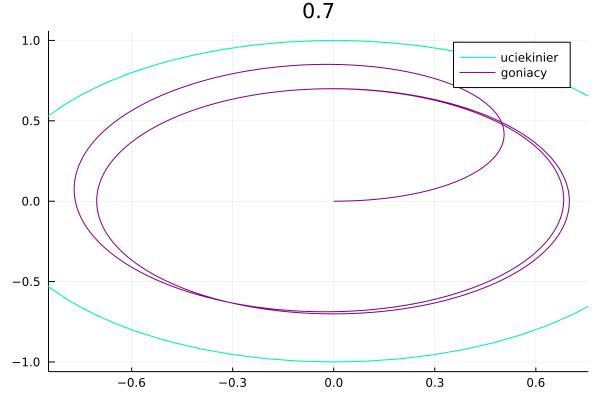

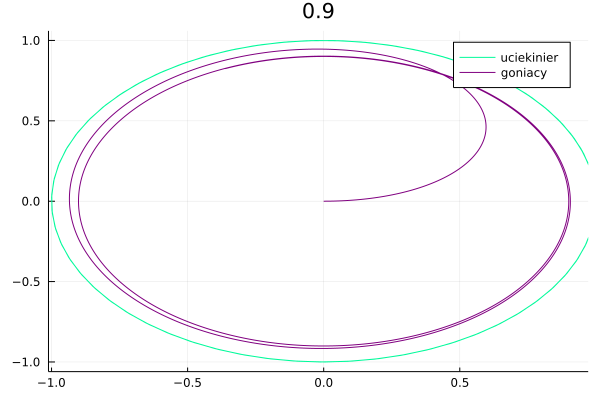

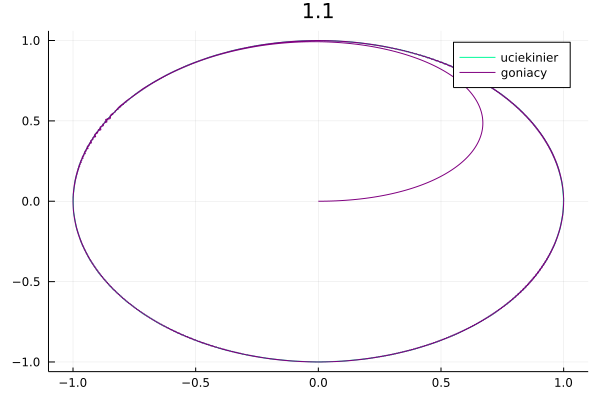

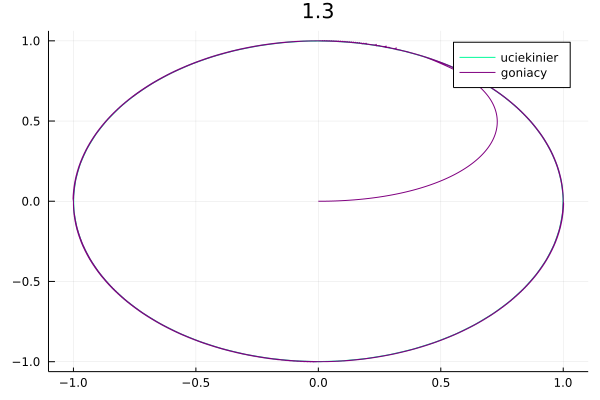

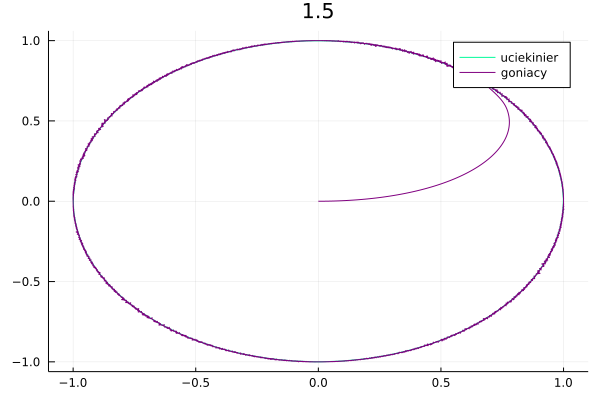

In [68]:
for k in 0.5:0.2:1.5
    okrag_param(k,15)
end

#### Jak się mają do siebie $R$ i $k$? <a class="anchor" id="RK"></a>

Wygląda na to, że i tym razem $k>1$, aby punkty się dogoniły.<br>
Sprawdźmy teraz jednak jak rzeczywiście zachowują się nasze punkty względem siebie dla różnych $R$ i $k$. <br>


In [75]:
pursuit(u, k, t) = k * (pursued(t) - u) / norm(pursued(t)-u) ##ogólne równanie 
#pursued(t) = [cos(t), sin(t)] ##sparametryzowana krzywa ucieczki 
prob = ODEProblem(pursuit, [0.0, 0.0], (0.0, 8), 0.8) ##miejsce początkowe, ilość wykonań, stała k
sol = solve(prob, saveat=0.1);

function anim_okrag(k,R=1,tim=10)
    pursued(t) = [R*cos(t), R*sin(t)]
    anim = @animate for i = 1:0.1:tim
        prob = ODEProblem(pursuit, [0.0, 0.0], (0.0,i), k) 
        sol = solve(prob, saveat=0.1);

        pursuitplot(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-R-1,R+1), ylim=(-R-1,R+1), color="mediumspringgreen", title = k)
        pursuitplot!(sol.t, sol.u, label="goniacy", color="purple")
    end

    gif(anim, "okrag"*string(k)*".gif", fps = 10)
end


anim_okrag (generic function with 3 methods)

In [79]:
pursued(t) = [cos(t),sin(t)]
#anim_okrag(1.1)
#anim_okrag(0.9)

pursued (generic function with 1 method)

<img src="animacje\okrag1.1.gif"/>
<img src="animacje\okrag0.9.gif"/>

Z animacji wynika, że rzeczywiście $k$ powinno być większe od $1$. Sprawdźmy jednak odległości punktów wykorzystując wcześniej stworzoną funkcję.

In [80]:
function meet_o(k, R=1, acc=0.01, lgth = 30) ##acc - accuracy czyli dokładnosc wyznaczenia miejsca spotkania
    pursued(t) = [R*cos(t),R*sin(t)]
    prob = ODEProblem(pursuit, [0.0, 0.0], (0.0, lgth), k) 
    sol = solve(prob, saveat=0.1);

    odl = [sqrt((sol.u[i][1]-pursued.(sol.t)[i][1])^2 + (sol.u[i][2]-pursued.(sol.t)[i][2])^2) for i in 1:1:lgth*10]
    t = [i for i in 0:0.1:(lgth-0.1)]
    display(plot(t,odl,label="odległość od czasu",title=k))
    for i in 1:1:lgth*10
        if odl[i] < acc
            println("odl: ",odl[i])
            println("x: ",pursued.(sol.t)[i][1])
            println("y: ",pursued.(sol.t)[i][2])
            return
        end
    end
end

meet_o (generic function with 4 methods)

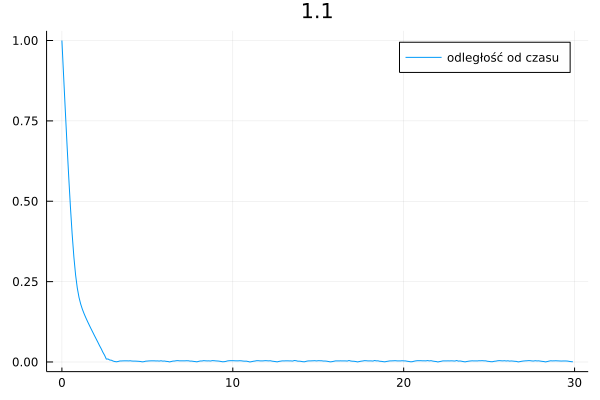

odl: 0.008876508727342797
x: -0.8568887533689473
y: 0.5155013718214642


In [81]:
pursued(t) = [cos(t),sin(t)]
meet_o(1.1)

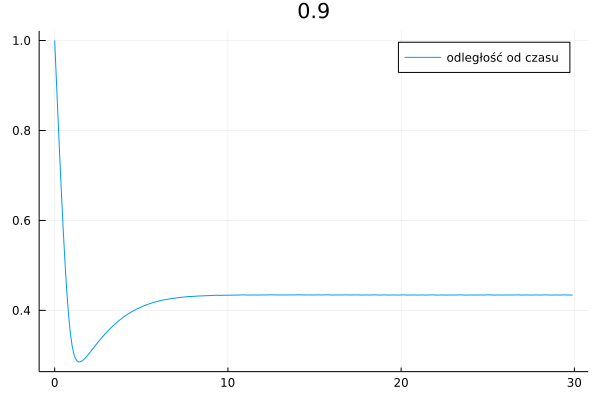

In [82]:
meet_o(0.9)

Można zauważyć, że dla $k=1.1$ wykres przybiera podobny kształt jak dla prostych krzywych pogoni w przypadku dogonienia się punktów. Funkcja policzyła nam, że stało się to mniej więcej w punkcie $(-0.9,0.5)$.<br>
Za to już w przypadku $k=0.9$ funkcja nie malała monotonicznie oraz odległości po pewnym czasie ustabilizowały się na jednym poziomie - w tym wypadku około $0.43$. Jest to dokładnie to, co zobaczyliśmy na animacji, gdyż i tam po pewnym czasie goniący zaczął krążyć po okręgu o pewnym stałym promieniu (wynoszącym około $0.9$).<br>
Teraz zanalizujmy sytuację graniczną, czyli $k=1$.

In [84]:
#anim_okrag(1)

<img src="animacje\okrag1.gif"/>

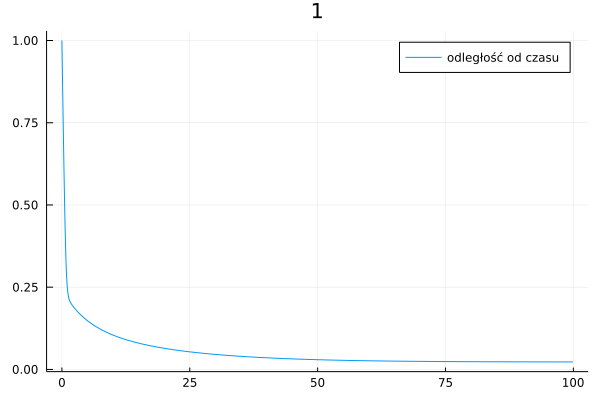

In [85]:
meet_o(1,1,0.01,100)

I tym razem dla $k=1$ teoretycznie goniący wchodzi na ścieżkę uciekiniera, lecz nie ma wystarczającej prędkości, by rzeczywiście go złapać.<br>
Wniosek zatem jest taki, że dla $R=1$ $k>1$, aby punkty się spotkały.

#### Co jeśli $R>1$?
Załóżmy teraz, że $R>1$. Ustaliliśmy już, że dla wszystkich poprzednich przypadków wystarczyło, żeby $k>1$, aby punkty się dogoniły. Jednak nigdy wcześniej nie mieliśmy żadnej innej stałej mnożącej nasze równania opróc $k$. Sprawdźmy zatem zachowania punktów dla różnych kombinacji stałych.
Na początek niech $R=1.5$

In [87]:
pursued(t) = [1.5*cos(t),1.5*sin(t)]
#anim_okrag(1.1,1.5,20)

pursued (generic function with 1 method)

<img src="animacje\1.5okrag1.1.gif"/>

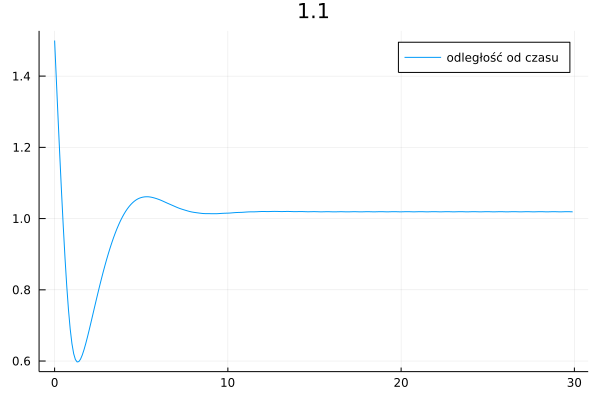

In [88]:
meet_o(1.1,1.5)

Wzięliśmy $k=1.1$, lecz z animacji oraz analiz odległości wynika, że goniący po pewnym czasie ustawił się na okręgu o stałym promieniu (w tym wypadku z animacji można odczytać, że owy promień wynosi około $1.1$), dokładnie jak w przypadku $R=1$ i $k=0.9$. Zatem się nie dogonią. <br>
Sprawdźmy kolejne $k$.

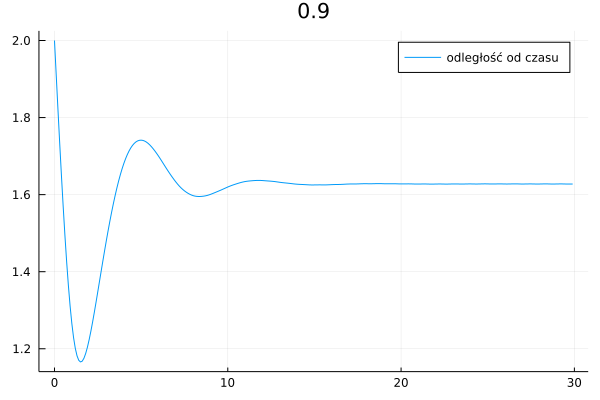

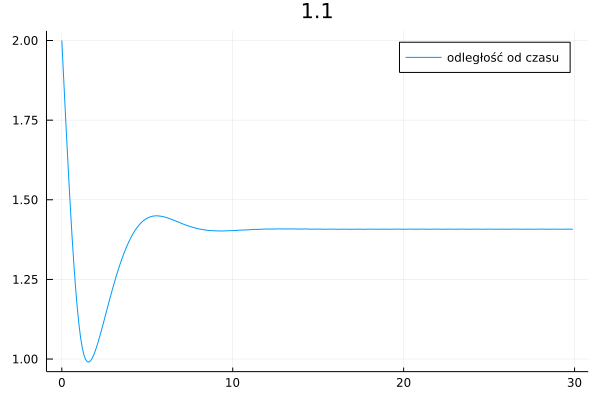

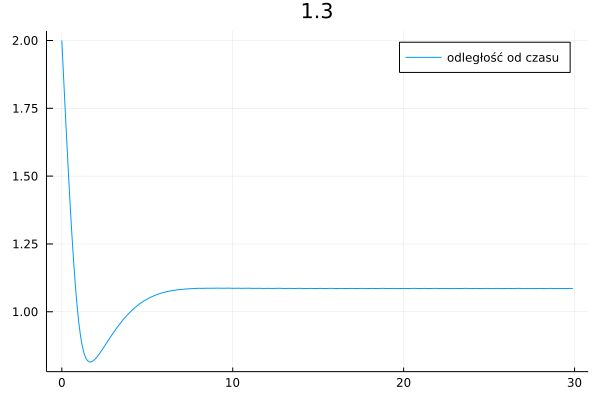

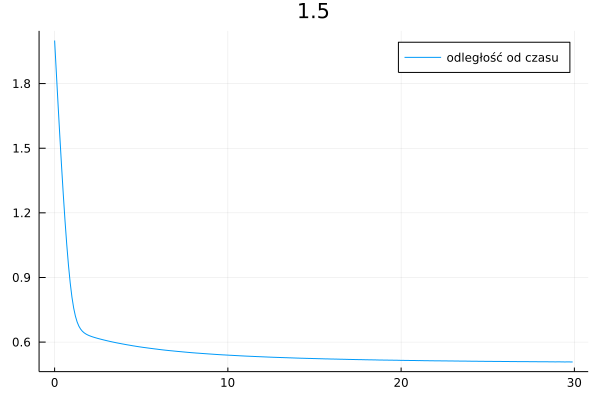

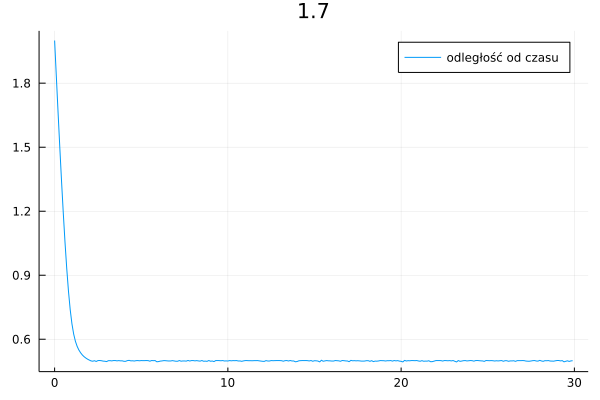

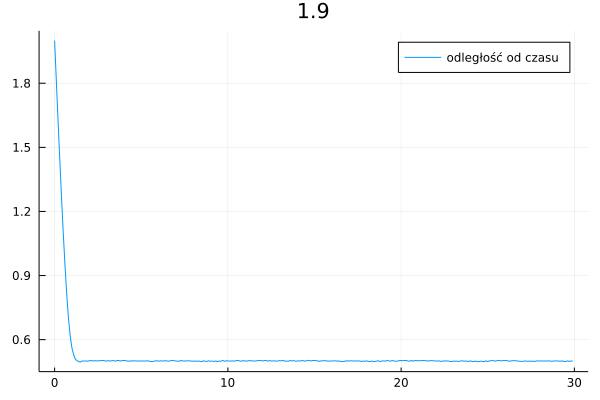

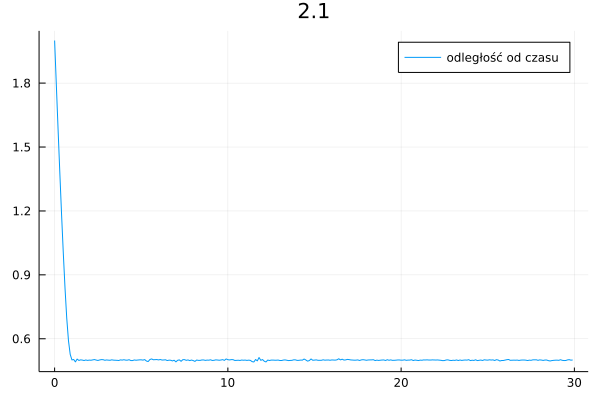

In [89]:
for k in 0.9:0.2:2.2
    meet_o(k,2)
end

Możemy zauważyć, że dla $k\leq 1.3$ goniący ląduje ostatecznie na okręgu o pewnym promieniu, więc nie dogoni on swojego celu.<br>
Gdy $k=1.5$, czyli $k=R$ otrzymujemy wykres bardzo podobny do tego z $k=R=1$, co oznajmia nam, że cel także nie zostanie dogoniony.<br>
Za to gdy $k>1.5$ dostajemy wykresy typowe dla ostatecznego spotkania się punktów.
Sprawdźmy jak to wygląda dla innych kombinacji stałych.

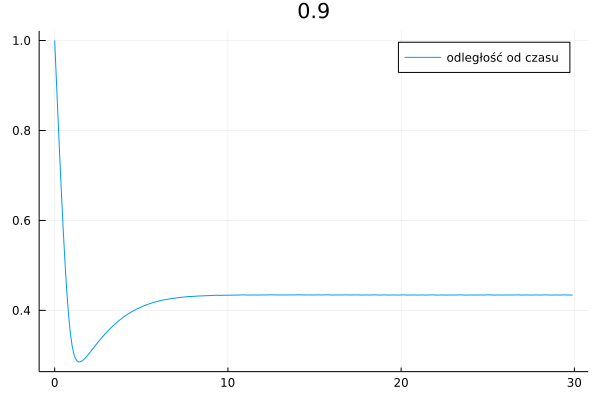

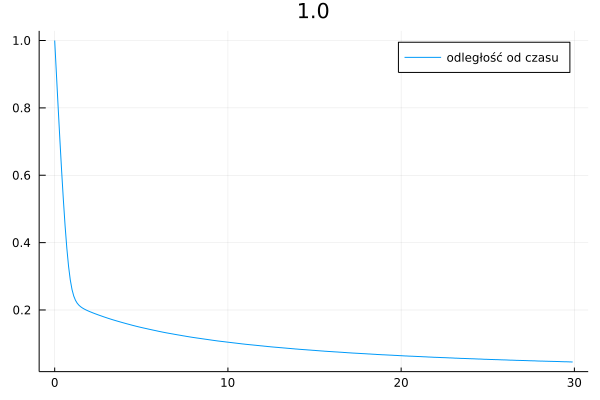

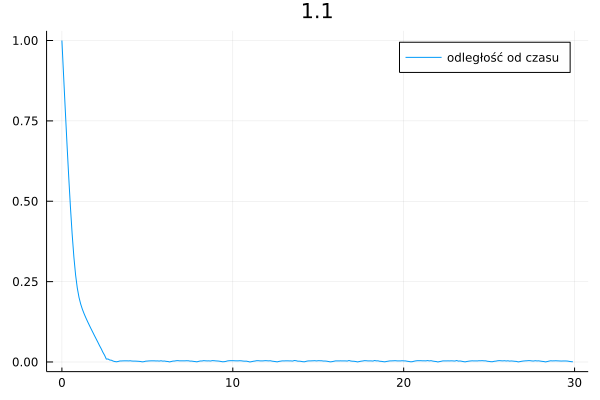

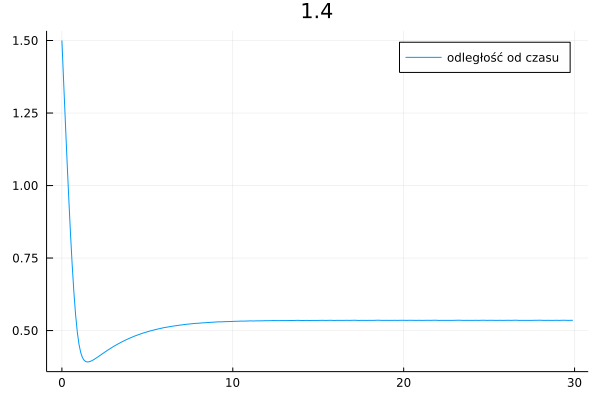

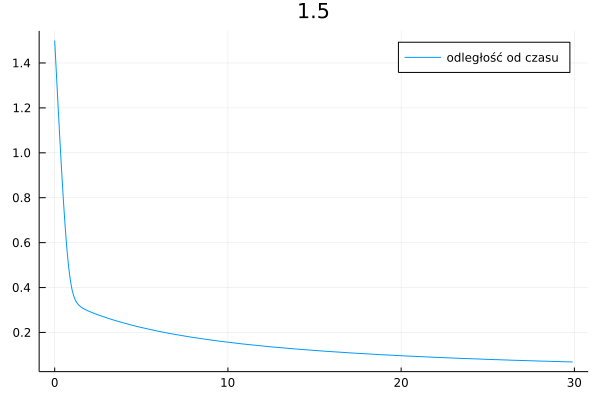

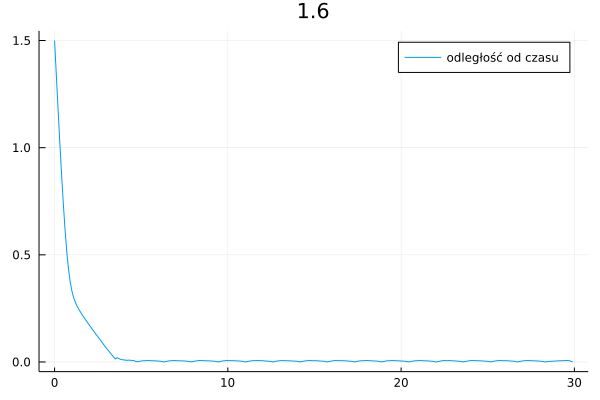

odl: 0.0027871188027315573
x: -0.9899924966004454
y: 0.1411200080598672


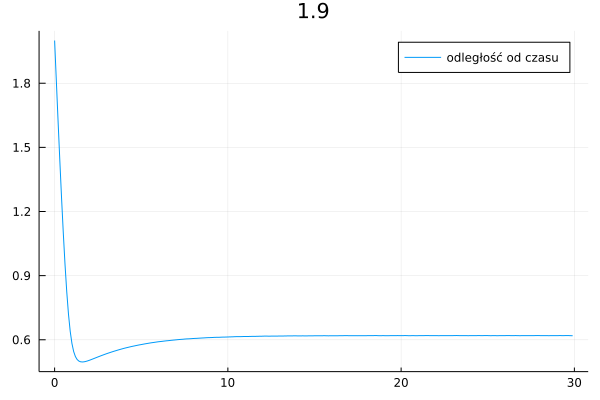

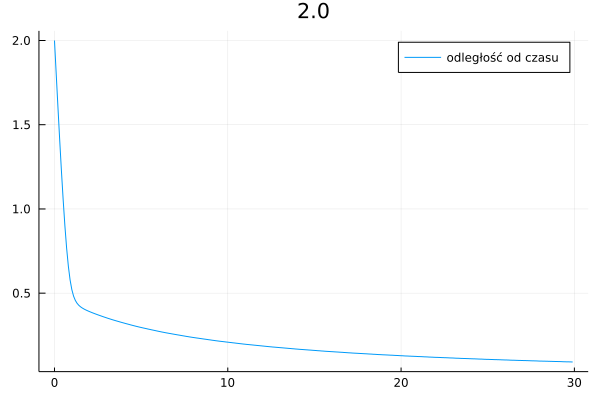

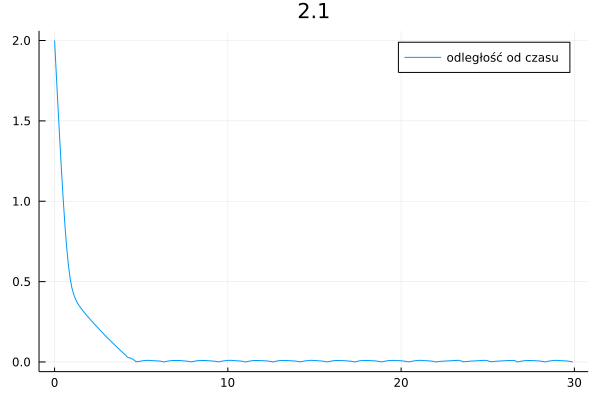

odl: 0.0016853375393040694
x: -0.01858299519433584
y: -1.4998848863461514


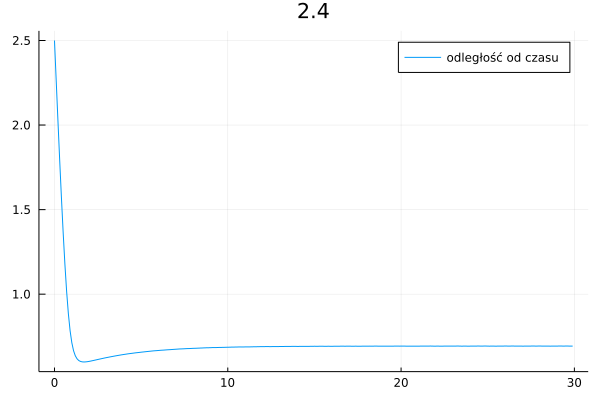

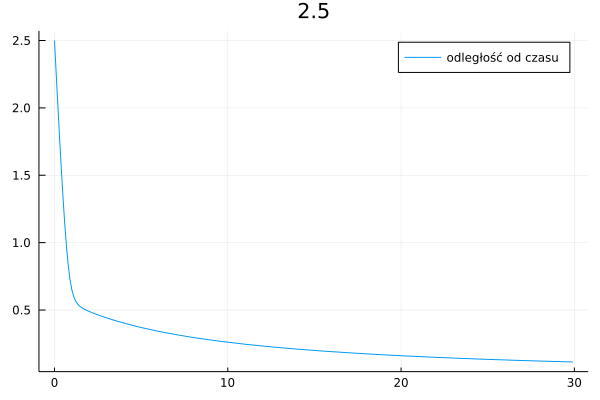

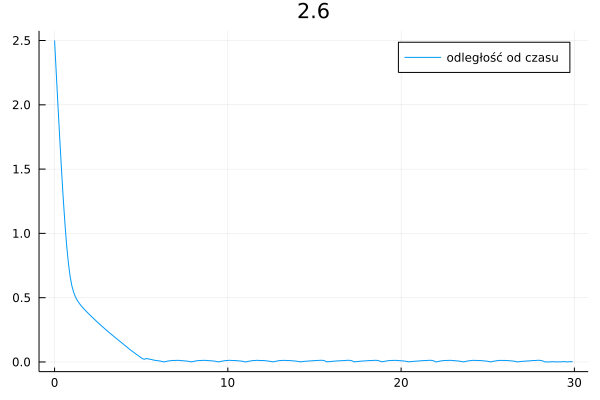

odl: 0.0015731486682632584
x: -0.02477732692578112
y: -1.9998465151282017


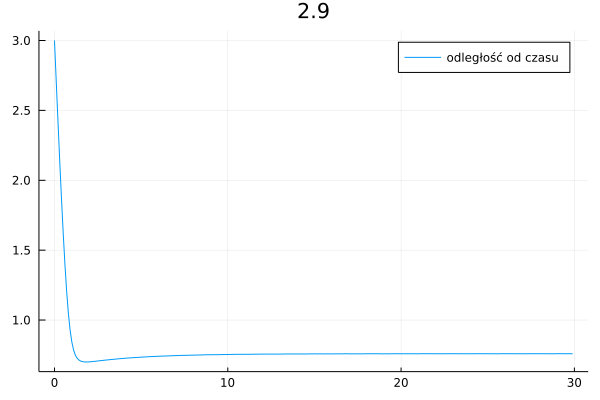

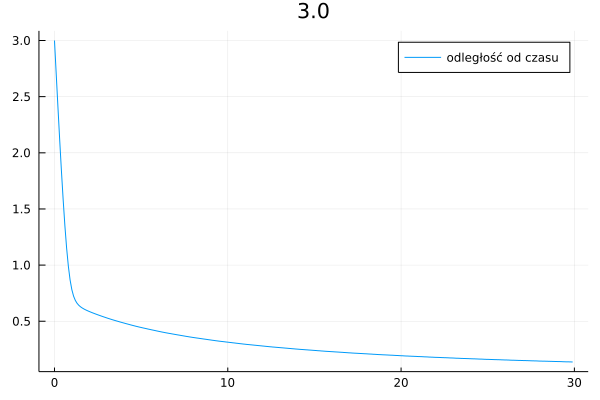

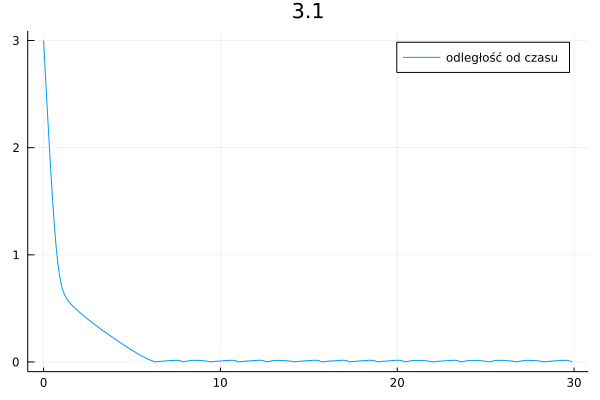

odl: 0.004038770141687071
x: 2.491355242558044
y: -0.20772350704374098
odl: 0.0004261761339898991
x: 2.9995759091502454
y: 0.05044170145304914


In [90]:
for R in 1:0.5:3
    pursued(t) = [R*cos(t),R*sin(t)]
    meet_o(R-0.1,R,0.005)
    meet_o(R,R,0.005)
    meet_o(R+0.1,R,0.005)
end

Rzeczywiście wykresy zachowują się dokładnie tak, jak przewidywaliśmy.<br>
Wniosek jest zatem taki, że aby punkty spotkały się ze sobą w ruchu po okręgu $k>R$.

### Inne ciekawe przykłady ruchu po krzywych sparametryzowanych <a class="anchor" id="przyklady1"></a>

Oczywiście wystarczy dać ponieść się fantazji, aby wymyślić ciekawe krzywe ucieczki a co za tym idzie nawet ciekawsze krzywe pogoni.<br>
Na początek weźmy znany nam ruch po okręgu, ale z punktem startowym goniącego gdzieś poza okręgiem - na przykład w $(4,-1)$. Wtedy krzywa pogoni wygląda następująco.

pursued(t) = [cos(t),sin(t)]
anim = @animate for i = 1:0.1:10
    prob = ODEProblem(pursuit, [4.0, -1.0], (0.0,i), 1.1) 
    sol = solve(prob, saveat=0.1);

    pursuitplot(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-2,5), ylim=(-2,2), color="mediumspringgreen")
    pursuitplot!(sol.t, sol.u, label="goniacy", color="purple")
end

gif(anim, "inne"*".gif", fps = 10)

<img src="animacje\inne.gif"/>

Krzywa Talbota dla $a = 0.9$ 

pursued(t) = [(1 +  0.9*(sin(t))^2)*cos(t), (0.1 - 0.9*(cos(t))^2)*sin(t)]
anim = @animate for i = 1:0.1:15
    prob = ODEProblem(pursuit, [0,-4], (0.0,i), 0.9) 
    sol = solve(prob, saveat=0.1);

    pursuitplot(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-2,2), ylim=(-2,2), color="mediumspringgreen")
    pursuitplot!(sol.t, sol.u, label="goniacy", color="purple")
end

gif(anim, "talbot"*".gif", fps = 10)

<img src="animacje\talbot.gif"/>

I asteroida:

pursued(t) = [3*cos(t)+cos(3*t),3*sin(t)-sin(3*t)]
anim = @animate for i = 1:0.1:15
    prob = ODEProblem(pursuit, [0,0], (0.0,i), 1.1) 
    sol = solve(prob, saveat=0.1);

    pursuitplot(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-5,5), ylim=(-5,5), color="mediumspringgreen")
    pursuitplot!(sol.t, sol.u, label="goniacy", color="purple")
end

gif(anim, "asteroida"*".gif", fps = 10)

<img src="animacje\asteroida.gif"/>

### Ucieczka w $\mathbb{R}^3$ <a class="anchor" id="3D"></a>

#### Wzór ogólny <a class="anchor" id="wypr_3D"></a>

Wyprowadziliśmy wzory na krzywą ucieczki w układzie współrzędnych dwóch zmiennych, jednak jeszcze realistyczniejszy byłby ruch ciał w $\mathbb{R}^3$. Algorytm wyprowadzania równań jest identyczny. 

Mamy krzywą daną parametrycznie uciekającego $r(t)=[r_{1}(t),r_{2}(t),r_{3}(t)]$ i chcemy sprawdzić jak tym razem wyglądałaby krzywa pościgu goniącego  $h(t)=[h_{1}(t),h_{2}(t), h_{3}(t)]$.<br>
Wektor prędkości goniącego jest postaci $\frac{dh(t)}{dt} = \left[ \frac{dh_{1}(t)}{dt},\frac{dh_{2}(t)}{dt}, \frac{dh_{3}(t)}{dt}\right] $.<br>
Wektor prędkości, wyznaczający kierunek, nazwijmy go $s(t)$, wyraża się poprzez wektor zmiany przemieszczenia na osi $X$ oraz $Y$, a więc $s(t) = \left[h_1(t)-r_1(t),h_2(t)-r_2(t),h_3(t)-r_3(t))\right]$. <br>
Chcemy jednak by był on odpowiedniej długości, zatem pierwsze musimy go znormalizować - podzielić go przez długość $s(t)$, aby następnie pomnożyć przez długość szukanego wektora prędkości $\frac{dh(t)}{dt}$. <br>
Długość wektora $s(t)$ wyraża się wzorem $|s(t)| = \sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2 + \left(h_3(t)-r_3(t)\right)^2}.$<br>
A długość $\left| \frac{dh(t)}{dt} \right|$ znajdziemy przez wykorzystanie założenia, że stosunek prędkości goniącego do uciekiniera wyniesie pewną stałą $\frac{\left|\frac{dh(t)}{dt}\right|}{\left|\frac{dr(t)}{dt}\right|}=k$. <br>
Otrzymujemy, że $\left|\frac{dh(t)}{dt}\right|=k\left|\frac{dr(t)}{dt}\right|$.Wstawiamy wszystko do równania.
$$\frac{dh(t)}{dt}=
k\frac{\left|\frac{dr(t)}{dt}\right|}{\left|r(t)-h(t)\right|}\left[ r_1(t)-h_1(t), r_2(t)-h_2(t), r_3(t)-h_3(t)\right]$$

Dzięki temu uzyskujemy ostateczne równania $\frac{dh_1(t)}{dt}$, $\frac{dh_2(t)}{dt}$ oraz $\frac{dh_3(t)}{dt}$ szukanej krzywej pościgowej.
$$h_1'(t) = k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2 + \left( \frac{dr_3(t)}{dt}\right)^2}\frac{r_1(t)-h_1(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2 + \left(h_3(t)-r_3(t)\right)^2 }}$$
$$h_2'(t)= k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2 + \left( \frac{dr_3(t)}{dt}\right)^2}\frac{r_2(t)-h_2(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2 + \left(h_3(t)-r_3(t)\right)^2 }}$$
$$h_3'(t)= k\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2 + \left( \frac{dr_3(t)}{dt}\right)^2}\frac{r_3(t)-h_3(t)}{\sqrt{\left(h_1(t)-r_1(t)\right)^2 + \left(h_2(t)-r_2(t)\right)^2 + \left(h_3(t)-r_3(t)\right)^2 }}$$

### Ruch po helisie <a class="anchor" id="helisa"></a>

Załóżmy że uciekinier ucieka po krzywej danej parametrycznie w $\mathbb{R}^3$ wzorem $r(t)=[cos(t),sin(t),t]$. Zatem
$$\frac{dr_1(t)}{dt} = -sin(t),$$
$$\frac{dr_2(t)}{dt} = cos(t),$$
$$\frac{dr_3(t)}{dt} = 1.$$
Stąd
$\sqrt{\left( \frac{dr_1(t)}{dt}\right)^2 + \left( \frac{dr_2(t)}{dt}\right)^2 + \left( \frac{dr_3(t)}{dt}\right)^2} =\sqrt{\left(-sin(t)\right)^2 + \left( cos(t)\right)^2 + 1^2}  = \sqrt{1+1} = \sqrt{2}$.

Dla przejrzystości zapiszmy $h(t)=[x(t),y(t),z(t)]$. <br>
Krzywa ma zatem postać $\frac{dh(t)}{dt}=
\frac{k\sqrt{2}}{\sqrt{\left(x(t)-cos(t)\right)^2 + \left(y(t)-sin(t)\right)^2 + \left(z(t)-t\right)^2 }}\left[ cos(t)-x(t), sin(t)-y(t), t-z(t)\right]$. <br>
Wykorzystajmy jeszcze raz zasoby Julii do ozobrazowania sytuacji.

In [102]:
function lorenz2!(du,u,k,t)
 du[1] = sqrt(2)*k*(cos(t)-u[1])/sqrt((cos(t)-u[1])^2+(sin(t)-u[2])^2 + (t-u[3])^2)
 du[2] = sqrt(2)*k*(sin(t)-u[2])/sqrt((cos(t)-u[1])^2+(sin(t)-u[2])^2 + (t-u[3])^2)
 du[3] = sqrt(2)*k*(t-u[3])/sqrt((cos(t)-u[1])^2+(sin(t)-u[2])^2 + (t-u[3])^2)
end
function sruba(k,tim=15)
    u0 = [0.0;0.0;0.0]
    tspan = (0.0,tim)
    prob = ODEProblem(lorenz2!,u0,tspan,k)
    sol = solve(prob)
    x = [cos(t) for t in 0:0.1:tim]
    y = [sin(t) for t in 0:0.1:tim]
    z = [t for t in 0:0.1:tim]
    plot(x,y,z, color="crimson",label="uciekinier", title=k)
    display(plot!(sol,vars=(1,2,3), color="chartreuse1",label="goniacy"))
end

sruba (generic function with 2 methods)

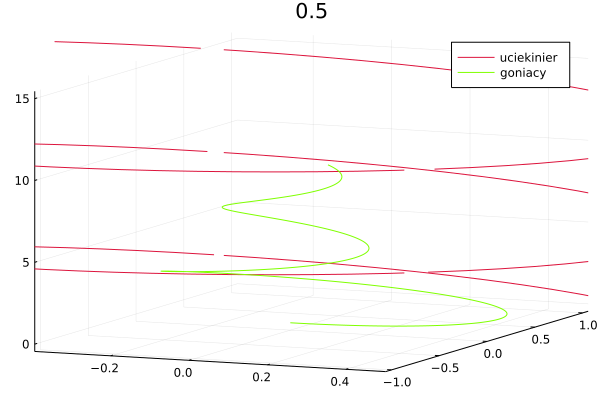

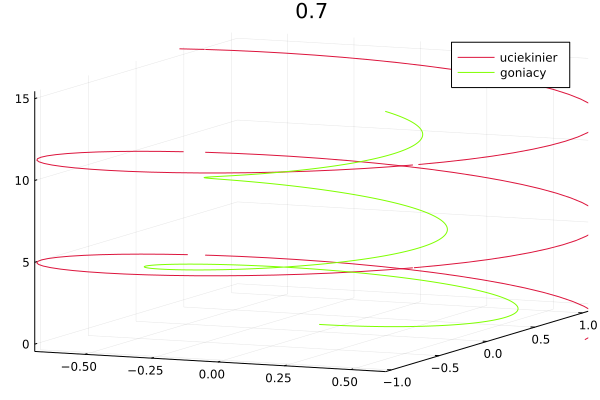

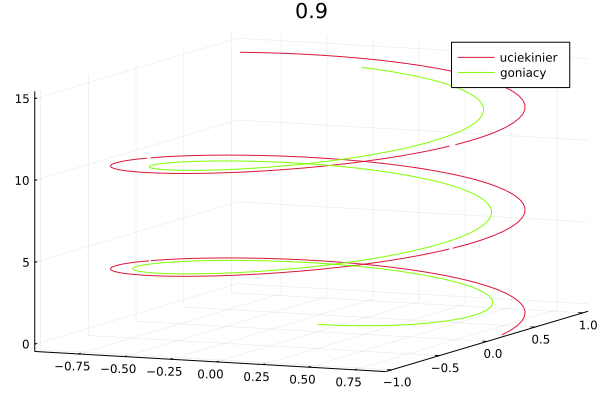

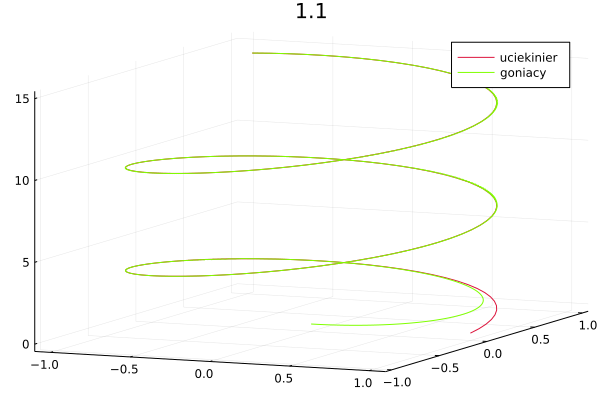

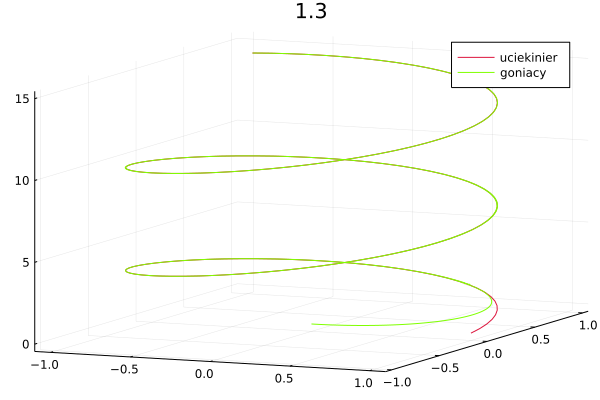

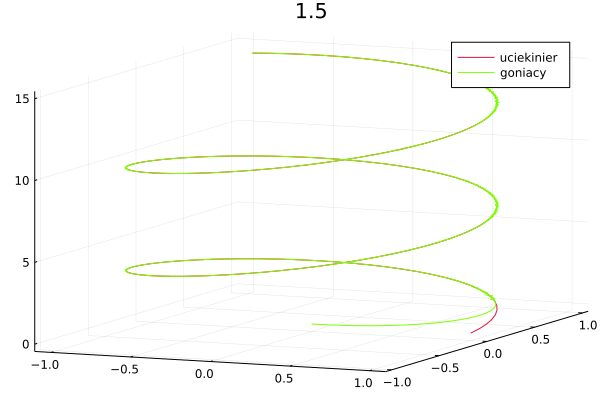

In [103]:
for k in 0.5:0.2:1.5
    sruba(k)
end

Jeszcze raz zobrazujmy sytuację animacjami, tym razem w układzie trzech współrzędnych, aby dowiedzieć się dla jakich $k$ punkty tym razem się dogonią.

In [107]:

@userplot PursuitPlot3
@recipe function f(cp::PursuitPlot3)
    t, u = cp.args
    x = [u[i][1] for i in 1:1:length(u)-1]
    y = [u[i][2] for i in 1:1:length(u)-1]
    z = [u[i][3] for i in 1:1:length(u)-1]
    n = length(x) ##im dłuzsza lista x tym grubszy marker
    linewidth --> range(0.75, 10, length = n+1)
    aspect_ratio --> 1
    x, y, z
end

pursuit(u, k, t) = k * (pursued(t) - u) / norm(pursued(t)-u) ##ogólne równanie 
pursued(t) = [cos(t), sin(t),t] ##sparametryzowana krzywa ucieczki 

function anim_r3(k)
    anim = @animate for i = 1:0.1:10
        prob = ODEProblem(pursuit, [0, 0, 0], (0.0,i), k) 
        sol = solve(prob, saveat=0.1);
        pursuitplot3(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-5,5), ylim=(-5,5),zlim=(0,10), color="crimson", title=k)
        pursuitplot3!(sol.t, sol.u, label="goniacy", color="chartreuse1")
    end
    gif(anim, "r3a"*string(k)*".gif", fps = 10)
end

anim_r3 (generic function with 1 method)

In [112]:
#anim_r3(0.9)
#anim_r3(1.4)
#anim_r3(1.5)

<img src="animacje\r3a0.9.gif"/>
<img src="animacje\r3a1.4.gif"/>
<img src="animacje\r3a1.5.gif"/>

Tym razem sytuacja zdaje się zmieniać pomiędzy $k=1.4$ i $k=5$. Jednak poprzez analogię z poprzedniego przykładu można przypuszczać, że wartością graniczną będzie tym razem $\sqrt{2}$.

In [113]:
function meet_r3(k, acc=0.01, lgth = 30) ##acc - accuracy czyli dokładnosc wyznaczenia miejsca spotkania
    pursued(t) = [cos(t),sin(t), t]
    prob = ODEProblem(pursuit, [0, 0, 0], (0.0,lgth), k) 
    sol = solve(prob, saveat=0.1);
        
    odl = [sqrt((sol.u[i][1]-pursued.(sol.t)[i][1])^2 + (sol.u[i][2]-pursued.(sol.t)[i][2])^2 + (sol.u[i][3]-pursued.(sol.t)[i][3])^2) for i in 1:1:lgth*10]
    t = [i for i in 0:0.1:(lgth-0.1)]
    display(plot(t,odl,label="odległość od czasu",title=k))
    for i in 1:1:lgth*10
        if odl[i] < acc
            println("odl: ",odl[i])
            println("x: ",pursued.(sol.t)[i][1])
            println("y: ",pursued.(sol.t)[i][2])
            println("z: ",pursued.(sol.t)[i][3])
            return
        end
    end
end

meet_r3 (generic function with 3 methods)

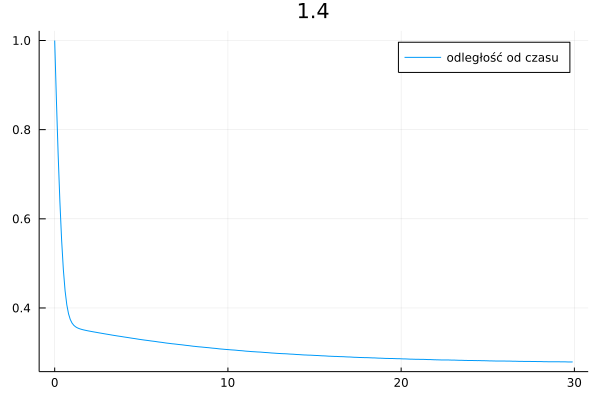

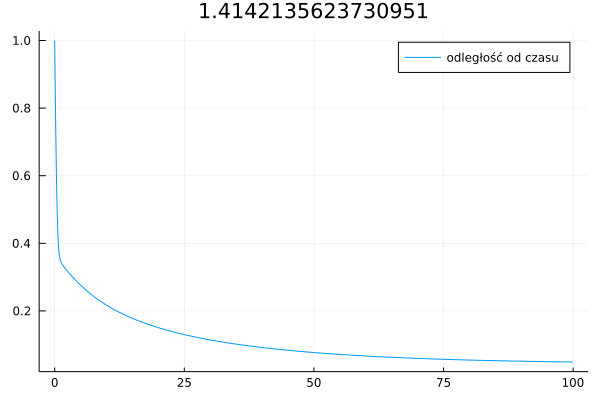

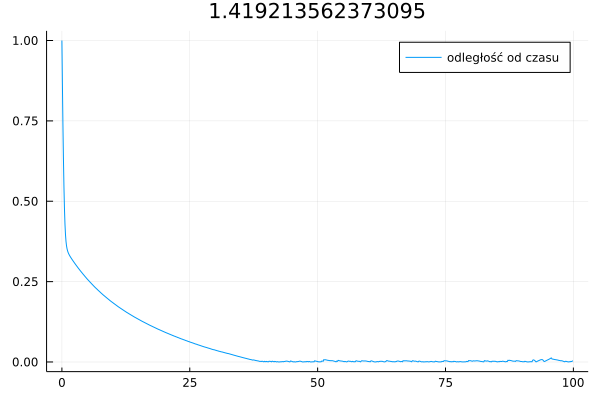

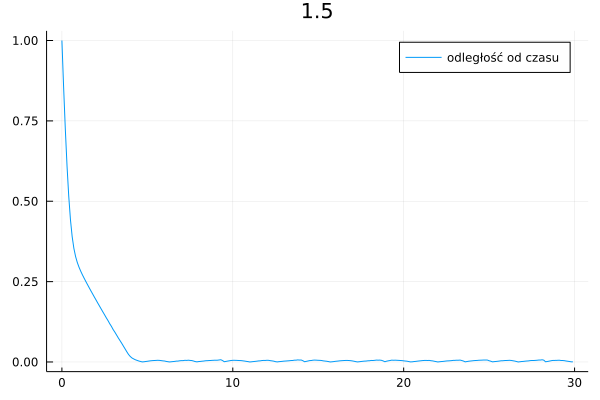

odl: 0.00984058504486255
x: 0.17084230974764966
y: -0.9852983838412038
z: 36.3
odl: 0.009525433815694642
x: -0.4902608213406994
y: -0.8715757724135882
z: 4.2


In [114]:
meet_r3(1.4)
meet_r3(sqrt(2),0.01,100)
meet_r3(sqrt(2)+0.005,0.01,100)
meet_r3(1.5)

Wykresy potwierdziły naszą hipotezę, punkty dogonią się, gdy $k>\sqrt{2}$.

### Inne krzywe pogoni w $\mathbb{R}^3$ <a class="anchor" id="przyklady2"></a>
I tym razem Julia świetnie radzi sobie z generowaniem animacji dla fantazyjnych krzywych ucieczki.

pursuit(u, k, t) = k * (pursued(t) - u) / norm(pursued(t)-u) ##ogólne równanie 
pursued(t) = [(cos(t))^2 - sin(2*t), sin(t),cos(t)] ##sparametryzowana krzywa ucieczki 


anim = @animate for i = 1:0.1:15
    prob = ODEProblem(pursuit, [4, 3, 0], (0.0,i), 1.1) 
    sol = solve(prob, saveat=0.1);
    pursuitplot3(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-3,3), ylim=(-3,3),zlim=(-2,2), color="crimson")
    pursuitplot3!(sol.t, sol.u, label="goniacy", color="chartreuse1")
end
gif(anim, "cos"*".gif", fps = 10)


<img src="animacje\cos.gif"/>

pursuit(u, k, t) = k * (pursued(t) - u) / norm(pursued(t)-u) ##ogólne równanie 
pursued(t) = [(cos(t))^2 - sin(2*t), sin(t)+t/5,cos(t)] ##sparametryzowana krzywa ucieczki 


anim = @animate for i = 1:0.1:15
    prob = ODEProblem(pursuit, [4, 3, 0], (0.0,i), 1.1) 
    sol = solve(prob, saveat=0.1);
    pursuitplot3(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-3,3), ylim=(-3,3),zlim=(-2,2), color="crimson")
    pursuitplot3!(sol.t, sol.u, label="goniacy", color="chartreuse1")
end
gif(anim, "cos2"*".gif", fps = 10)


<img src="animacje\cos2.gif"/>

pursued(t) = [sin(t)*cos(t), t/5, sin(t)-cos(t)]
anim = @animate for i = 1:0.1:15
    prob = ODEProblem(pursuit, [-2, 1, -1], (0.0,i), 1.1) 
    sol = solve(prob, saveat=0.1);
    pursuitplot3(sol.t, pursued.(sol.t), label="uciekajacy", xlim=(-2,2), ylim=(-2,2),zlim=(-2,2), color="crimson")
    pursuitplot3!(sol.t, sol.u, label="goniacy", color="chartreuse1")
end
gif(anim, "cos3"*".gif", fps = 10)

<img src="animacje\cos3.gif"/>

--tu jeszcze jedna czy dwie krzywe, bo są ładne--

## PAJĄCZKI <a class="anchor" id="pajak"></a>

PAJĄCZKI 
https://www.youtube.com/watch?v=NdTVvWrD6r0<br>
https://en.wikipedia.org/wiki/Mice_problem

https://blogs.mathworks.com/steve/2019/02/14/pursuit-curves/<br>
https://matematyka.pl/viewtopic.php?t=434920

---- Piekne wykresy po pajaczkach

Ciekawym problemem również jest tak zwany szerzej opisywany "Mice problem" ~ Wiki "W matematyce problem myszy jest ciągłym problemem pościgu-unikania, w którym pewna liczba myszy (lub owadów, psów, pocisków itp.) jest umieszczona w rogach wielokąta foremnego . W klasycznym ustawieniu każdy z nich zaczyna wtedy poruszać się w kierunku swojego najbliższego sąsiada ( zgodnie lub przeciwnie do ruchu wskazówek zegara ).". 

Zajmiemy się następującym zadaniem, mianowicie opiszemy ruch 4 pająków, które 'siedzą' w czterech róznych rogach kwadratowego sufitu. Każdy z nich zacznie podążać w kierunku sąsiada, aż do spotkania na środku sufitu.<br>
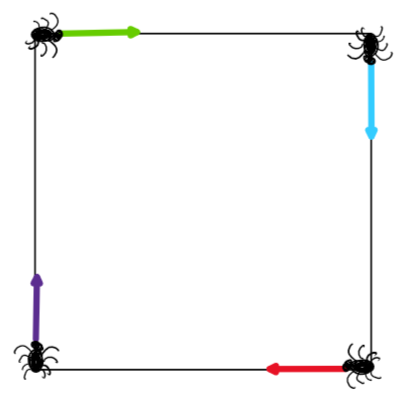
Na poniższy rysunku widać jak zmienia się ich wektor prędkości w zależności od aktualnego położenia ich 'celu'<br>
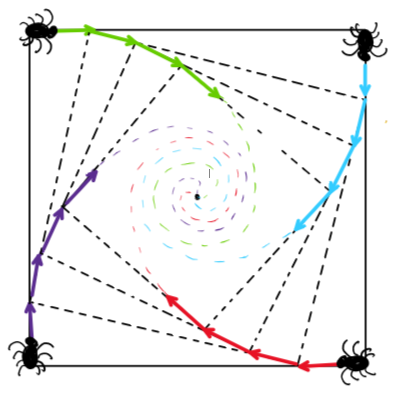

Rozważmy ten problem na układzie współrzędnych, interpretując sufit jako kwadrat o wymiarach $2$x$2$ ze środkiem pokrywającym się z początkiem tego układu. Ustawienie pająka $A$ ustalimy jako punkt $(1, 1)$, pająka $B(1, -1)$ itd... <br>
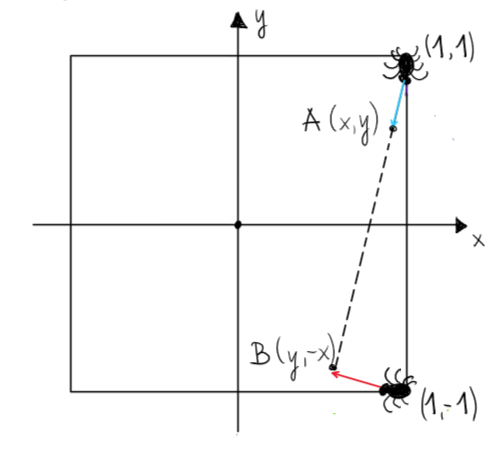

Teraz, współczynnik kierunkowy powyższej prostej |AB| możemy wyznaczyć i zapisać jako $\frac{y+x}{x-y}$. Jest to prosta styczna do krzywej ruchu pająków, której nachylenie się nie zmienia, dlatego też możemy zapisać $$\frac{dy}{dx} = \frac{y+x}{x-y}$$
$$dy = \frac{(y+x)dx}{x-y}$$

Aby rozwiązać równanie $y=y(x)$ skorzystamy z podstawienia <br> $$z=\frac{y}{x} \Rightarrow \begin{vmatrix}y = zx \\ dy = zdx + xdz \end{vmatrix}$$ <br>
$$ zdx + xdz = \frac{(z + 1)dx}{1 - z} $$ <br>
$$ xdz = (\frac{z + 1}{1 - z} - z)dx $$ <br>
$$ \frac{1 - z}{z^2 + 1}dz = \frac{1}{x}dx $$

Następnie korzystając z metody rozdzialnia zmiennych, scałkujemy obie strony równania

$$ \int \frac{1 - z}{z^2 + 1} dz = \int \frac{1}{x}dx $$ <br>
Rozwiążemy osobno lewą całkę (prawa jest trywialna)
$$ L = \int \frac{1 - z}{z^2 + 1} dz = -\frac{1}{2} \int \frac{2z}{z^2 + 1}dz + \int \frac{1}{z^2 + 1}dz = \begin{vmatrix} u = z^2 + 1 \\ du = 2zdz \end{vmatrix} \\ = -\frac{1}{2} \int \frac{1}{u}du + \arctan{z} = \arctan{z} - \frac{\ln{(z^2 + 1)}}{2}$$

Dochodzimy do rozwiązania postaci
$$ \arctan{z} - \frac{\ln{(z^2 + 1)}}{2} = \ln{x} + C , $$
a wracając do podstawienia $z = \frac{y}{x}$ otrzymujemy
$$ \arctan{\frac{y}{x}} - \ln{\sqrt{y^2 + x^2}} = C . $$ <br>
Teraz, podstawiając współrzędne początkowe pająka $A$ tj. $x = 1$ oraz $y = 1$, możemy wyznaczyć stałą $C$<br>
$$ C = \arctan{1} - \ln{\sqrt{2}}$$
$$ C = \frac{\pi}{4} - \ln{\sqrt{2}} $$
Ostatecznie
$$ \arctan{\frac{y}{x}} =  \ln{\sqrt{y^2 + x^2}} + \frac{\pi}{4} - \ln{\sqrt{2}} $$

Nie otrzymujemy jednak jawnego rozwiązania, dlatego skorzystamy ze współrzędnych biegunowych. <br>
$$\phi = \arctan{\frac{y}{x}}$$ <br>
$$r^2 = x^2 + y^2$$
Podstawiając je, spróbujemy wyznaczyć $r$
$$\begin{align}
\phi &= \ln{r} + \frac{\pi}{4} - \ln{\sqrt{2}} \\
\ln{r} &= \ln{\sqrt{2}} + \phi - \frac{\pi}{4} \phantom{--} \lvert \phantom{--} e^{\square} \\
r &= \sqrt{2}e^{(\phi - \frac{\pi}{4})} 
\end{align}$$

Gdyby jednak za punkt początkowy naszej pogoni wybrać punkt $(1, 0)$, stała $C$ byłaby równa $0$ <br>
 <br>
$$ C = \arctan(0) - \ln(1) = 0 - 0 = 0$$ <br>
Postępując po kolei, tak jak w przypadku wyżej, doszlibyśmy do równania postaci $$ r = e^\phi $$
Jest to równanie SPIRALI LOGARYTMICZNEJ $ r = ae^{(b\phi)} $ ze stałymi $a, b = 1$ <br>
-tu nie wiem jak napisac, ze tamto jest przesuniete w fazie- <br>
Dochodzimy więc do wniosku, że wspomniane wcześniej pająki 'gonią się' właśnie po takich spiralach.

## PIEKNE RYSOWANIE FUNKCJI

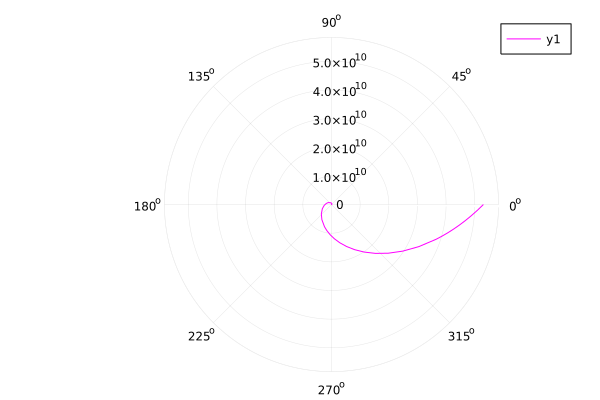

In [55]:
r(θ) = √2 * exp(θ-π/4)
 
plot(θ -> r(θ), 0, 8π,
    proj = :polar, linecolor = :magenta)

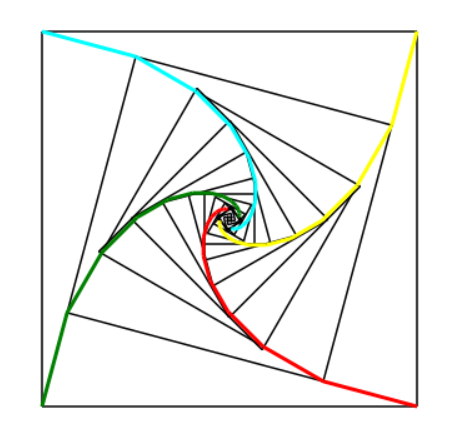

# Co w przypadku, gdy kształt sufitu jest inną figurą foremną?

Szmery bajery opis sytuacji

Będziemy rozpatrywać płaszczyznę zespoloną z uwagi na wcześniej wspomniane wielokąty foremne. Punkt $A = (x_{i}(t), y_{i}(t))$, $B = (x_{i+1}(t), y_{i+1}(t))$ i tak aż do $n-tego$ wierzchołka. Zależność(?) Przedstawić można nastęująco <br>
$$\frac{dx_{i}}{dt}(t) = \frac{x_{i+1}(t) - x_{i}(t)}{\sqrt{(x_{i+1}(t) - x_{i}(t))^2 + (y_{i+1}(t) - y_{i}(t))^2}}$$
Teraz wykorzytsując liczby zespolone każdy punkt $(x_{k}(t), y_{k}(t))$ można zapisać jako $z_{k}(t) = x_{k}(t) + iy_{k}(t)$ <br>
Zależność (?) wygląda teraz tak 
$$ \frac{dz_{k}}{dt}(t) = \frac{z_{k+1}(t) - z_{k}(t)}{|z_{k+1}(t) - z_{k}(t)|} $$
Teraz z uwagi na stałość kątów pomiędzy następnymi wierzchołakami figury, możemy współrzędne punktów uzależnić od siebie poprzez obrót o odpowiedni kąt. Do tego przyda nam się postać wykładnicza liczby zespolonej. Dla $n-kątnej$ (?) figury obrót wykoanmy o kąt $\frac{2\pi}{n}$
$$ z_{k+1}(t) = e^{\frac{2\pi}{n} i}z_{k}(t) $$
Wykorzystajmy to podstawienie
$$ \begin{split}
\frac{dz_{k}}{dt}(t) &= \frac{e^{\frac{2\pi}{n} i}z_{k}(t) - z_{k}(t)}{|e^{{2\pi}{n} i} - 1||z_{k}(t)|} = \frac{e^{\frac{2\pi}{n} i} - 1}{|e^{\frac{2\pi}{n} i} - 1|}\cdot\frac{z_{k}(t)}{|z_{k}(t)|} \\
 &= \frac{e^{\frac{\pi}{n} i}(e^{\frac{\pi}{n} i} - e^{-\frac{\pi}{n} i})}{|e^{\frac{\pi}{n} i} - e^{-\frac{\pi}{n} i}|}\cdot\frac{z_{k}(t)}{|z_{k}(t)|} \\ 
 &= \frac{e^{\frac{\pi}{n} i}(\cos{(\frac{\pi}{n})} + i\sin{(\frac{\pi}{n})} - \cos{(-\frac{\pi}{n})} - i\sin{(-\frac{\pi}{n})})}{|(\cos{(\frac{\pi}{n})} + i\sin{(\frac{\pi}{n})} - \cos{(-\frac{\pi}{n})} - i\sin{(-\frac{\pi}{n})})|}\cdot\frac{z_{k}(t)}{|z_{k}(t)|} \\
 &= \frac{e^{\frac{\pi}{n} i}2i\sin{(\frac{\pi}{n})}}{|2i\sin{(\frac{\pi}{n})}|}\cdot\frac{z_{k}(t)}{|z_{k}(t)|}
 = e^{\frac{\pi}{n} i}i\frac{z_{k}(t)}{|z_{k}(t)|} \\
 &= e^{\frac{\pi}{n} i} e^{\frac{\pi}{2} i} \frac{z_{k}(t)}{|z_{k}(t)|} = e^{(\frac{\pi}{n}i+\frac{\pi}{2}i)}\frac{z_{k}(t)}{|z_{k}(t)|}
\end{split} $$

Punkt można przekształcić na biegunowe korzystając z postaci trygonometrycznej liczby zespolonej (upewnic sie) $z(t) = r(t)e^{i\phi(t)}$ <br>
Wracając do powyższegio wyprowadzenia
$$\begin{align}
\frac{dz}{dt}(t) = \frac{dr}{dt}(t) e^{i\phi(t)} + ri\frac{d\phi}{dt}(t)e^{i\phi(t)} &= e^{(\frac{\pi}{n}i+\frac{\pi}{2}i)}e^{i\phi(t)} \\
\frac{dr}{dt}(t) + ir\frac{d\phi}{dt}(t) &= e^{(\frac{\pi}{n}i+\frac{\pi}{2}i)} \phantom{---}(1)
\end{align}$$
 Przyrównamy teraz do siebie części rzeczywiste powyższego równania $(1)$<br>
 $$ \begin{split}
 \frac{dr}{dt}(t) &= \cos{(\frac{\pi}{n}+\frac{\pi}{2})} = -sin{\frac{\pi}{n}} \\
 \int \frac{dr}{dt}(t) &=  -\int \sin{\frac{\pi}{n}} \\
 r(t) &= -\sin{\frac{\pi}{n}}(t) + C
 \end{split}$$ 
 Wykorzystajmy teraz fakt, że dla każdego wielokąta ustalamy promień początkowy $r(0) = 1 \Rightarrow C = 1$ czyli
 $$ r(t) = 1 - \sin{\frac{\pi}{n}}(t) $$
 Następnie przyrównamy części urojone równania $(1)$
 $$ \begin{split}
 r\frac{d\phi}{dt}(t) &= \sin{(\frac{\pi}{n}+\frac{\pi}{2})} = cos{\frac{\pi}{n}} \\
 \frac{d\phi}{dt}(t) &= \frac{cos{\frac{\pi}{n}}}{1 - \sin{\frac{\pi}{n}}(t)} \\
 \phi(t) &= \int^{t}_{0}\frac{cos{\frac{\pi}{n}}}{1 - \sin{\frac{\pi}{n}}(s)}ds \\
 \phi(t) &= -\cot{(\frac{\pi}{n})}\ln{(1 - \sin{\frac{\pi}{n}})}t 
 \end{split}$$
W środku logayrtmu, pojawiło nam się wcześniej wyprowadzone $r(t)$
$$\begin{split}
\phi(t) &= -\cot{(\frac{\pi}{n})}\ln{(r(t))}t \\
\ln{(r(t))} &= -\tan{(\frac{\pi}{n})}\phi(t) \\
r(t) &= e^{-\tan{(\frac{\pi}{n})}\phi(t)}
\end{split}$$
Uzależniając teraz jedynie od $\phi$ ostatcznie otrzymujemy 
### just like that przeskok?
$$ r = e^{-\tan{(\frac{\pi}{n})}\phi} $$

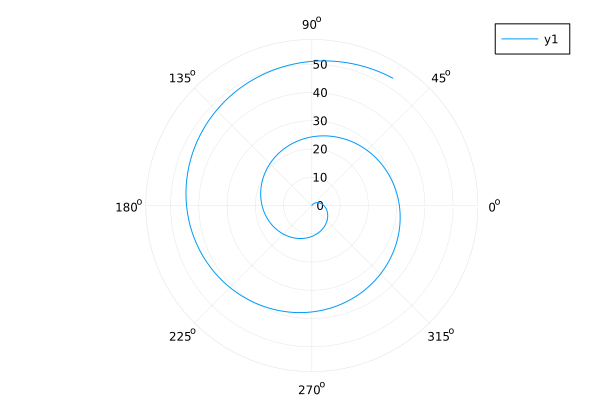

In [56]:
r(t) = 1 - sin(π/6)t
ϕ(t) = -cot(π/6)log(1 - sin(π/4))t
plot(r, ϕ, 0:0.01:8π, proj=:polar)

In [57]:
plot_polar(r, a, b; kwargs...) = plot(t -> r(t)*cos(t), t -> r(t)*sin(t), a, b; kwargs...)

plot_polar (generic function with 1 method)

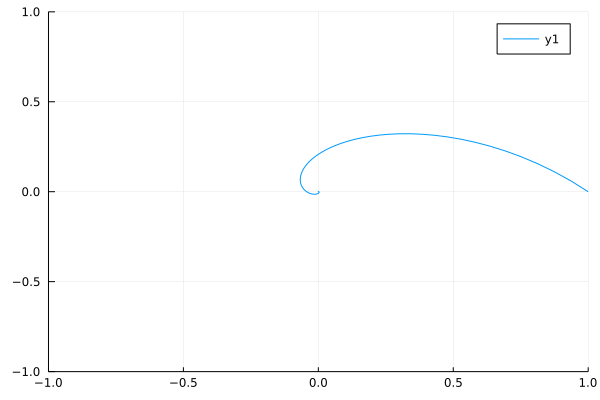

In [58]:
r(ϕ) = exp(-tan(π/4)ϕ)
plot_polar(r, 0, 4π,  xlim=(-1,1), ylim=(-1,1))

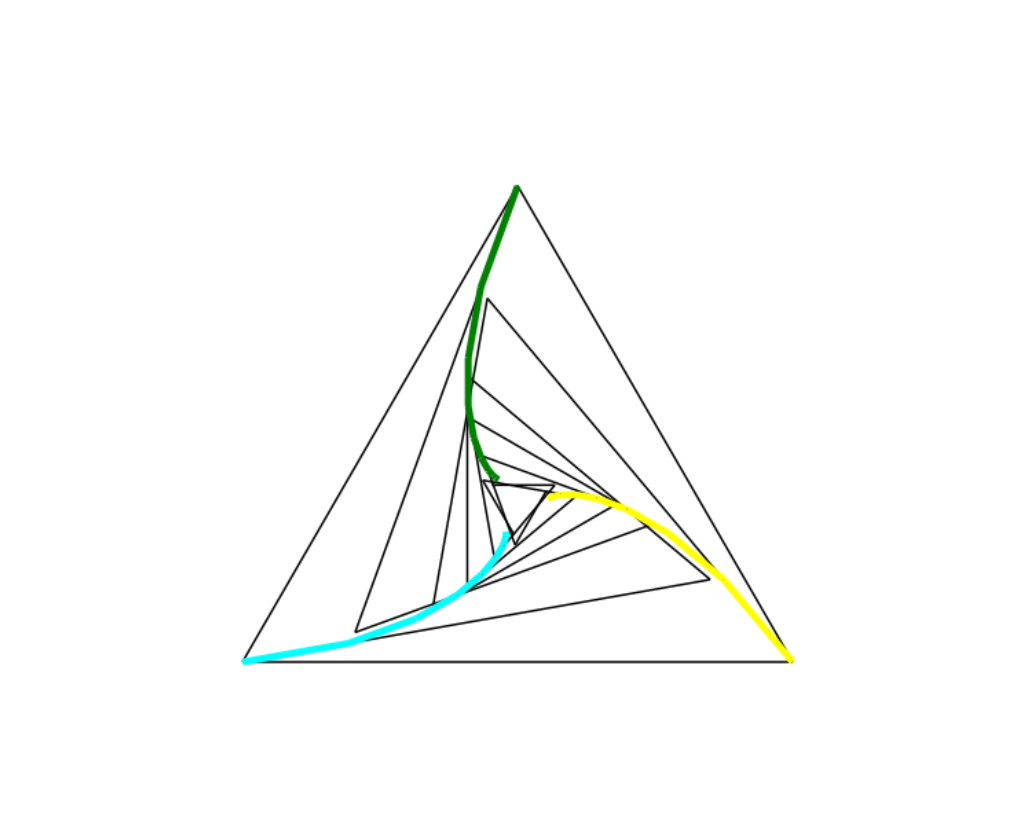

# Może porównanie obu podpunktów co do kwadratowego sufitu?

Rozważając oba powyższe wyprowadzenia dla kwadratu, otrzymaliśmy dwa równania <br>
  <br>
$$ r = e^\phi $$
$$ r = e^{-\tan{(\frac{\pi}{4})}\phi} = e^{-\phi}$$ <br>
#### Z czego wynika różńica w znaku potęgi?
W zadaniu, gdzie w kątach kwadratu umieszczaliśmy pająki, założyliśmy ruch przeciwny do ruchu wskazówek zegara. Inaczej sytuacja wyglądała podczas rozwiązywania ogólnego zagadnienia - zdecydowaliśmy się na uzależnienie od siebie nastęnych wieczchołków, poprzez przesuwanie jednego o kąt $ \frac{\pi}{n}$ .

# ciekawostka motylek 
nie umiem znalezc jakiegos zrodla tego faktu oprocz filmiku, chyba sie nie uda - nie wiem skad typ to wzial

# Podsumowanie

# Bibliografia